# Data importing & exploration

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from catboost import CatBoostClassifier 
from sklearn.utils import resample
from sklearn.metrics import classification_report,f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [2]:
diabetes = pd.read_csv("diabetes.csv")

In [3]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.rename(columns={"Outcome": "Result"}, inplace=True)

In [5]:
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.shape

(768, 9)

In [7]:
diabetes.info()
# no null values available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Result                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

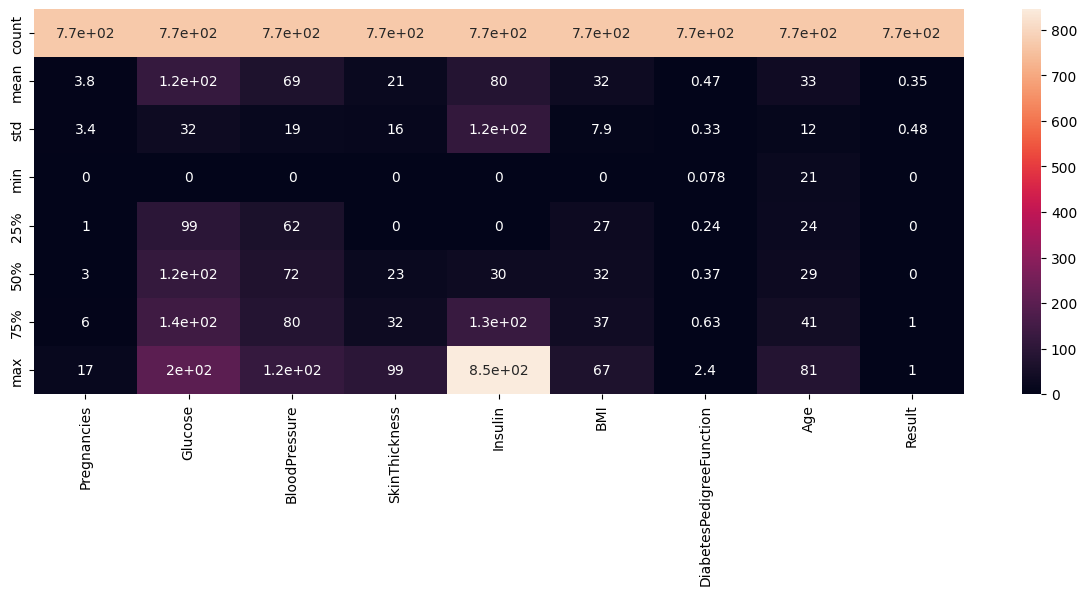

In [8]:
plt.figure(figsize=(15,5))
sns.heatmap(diabetes.describe(), annot=True)

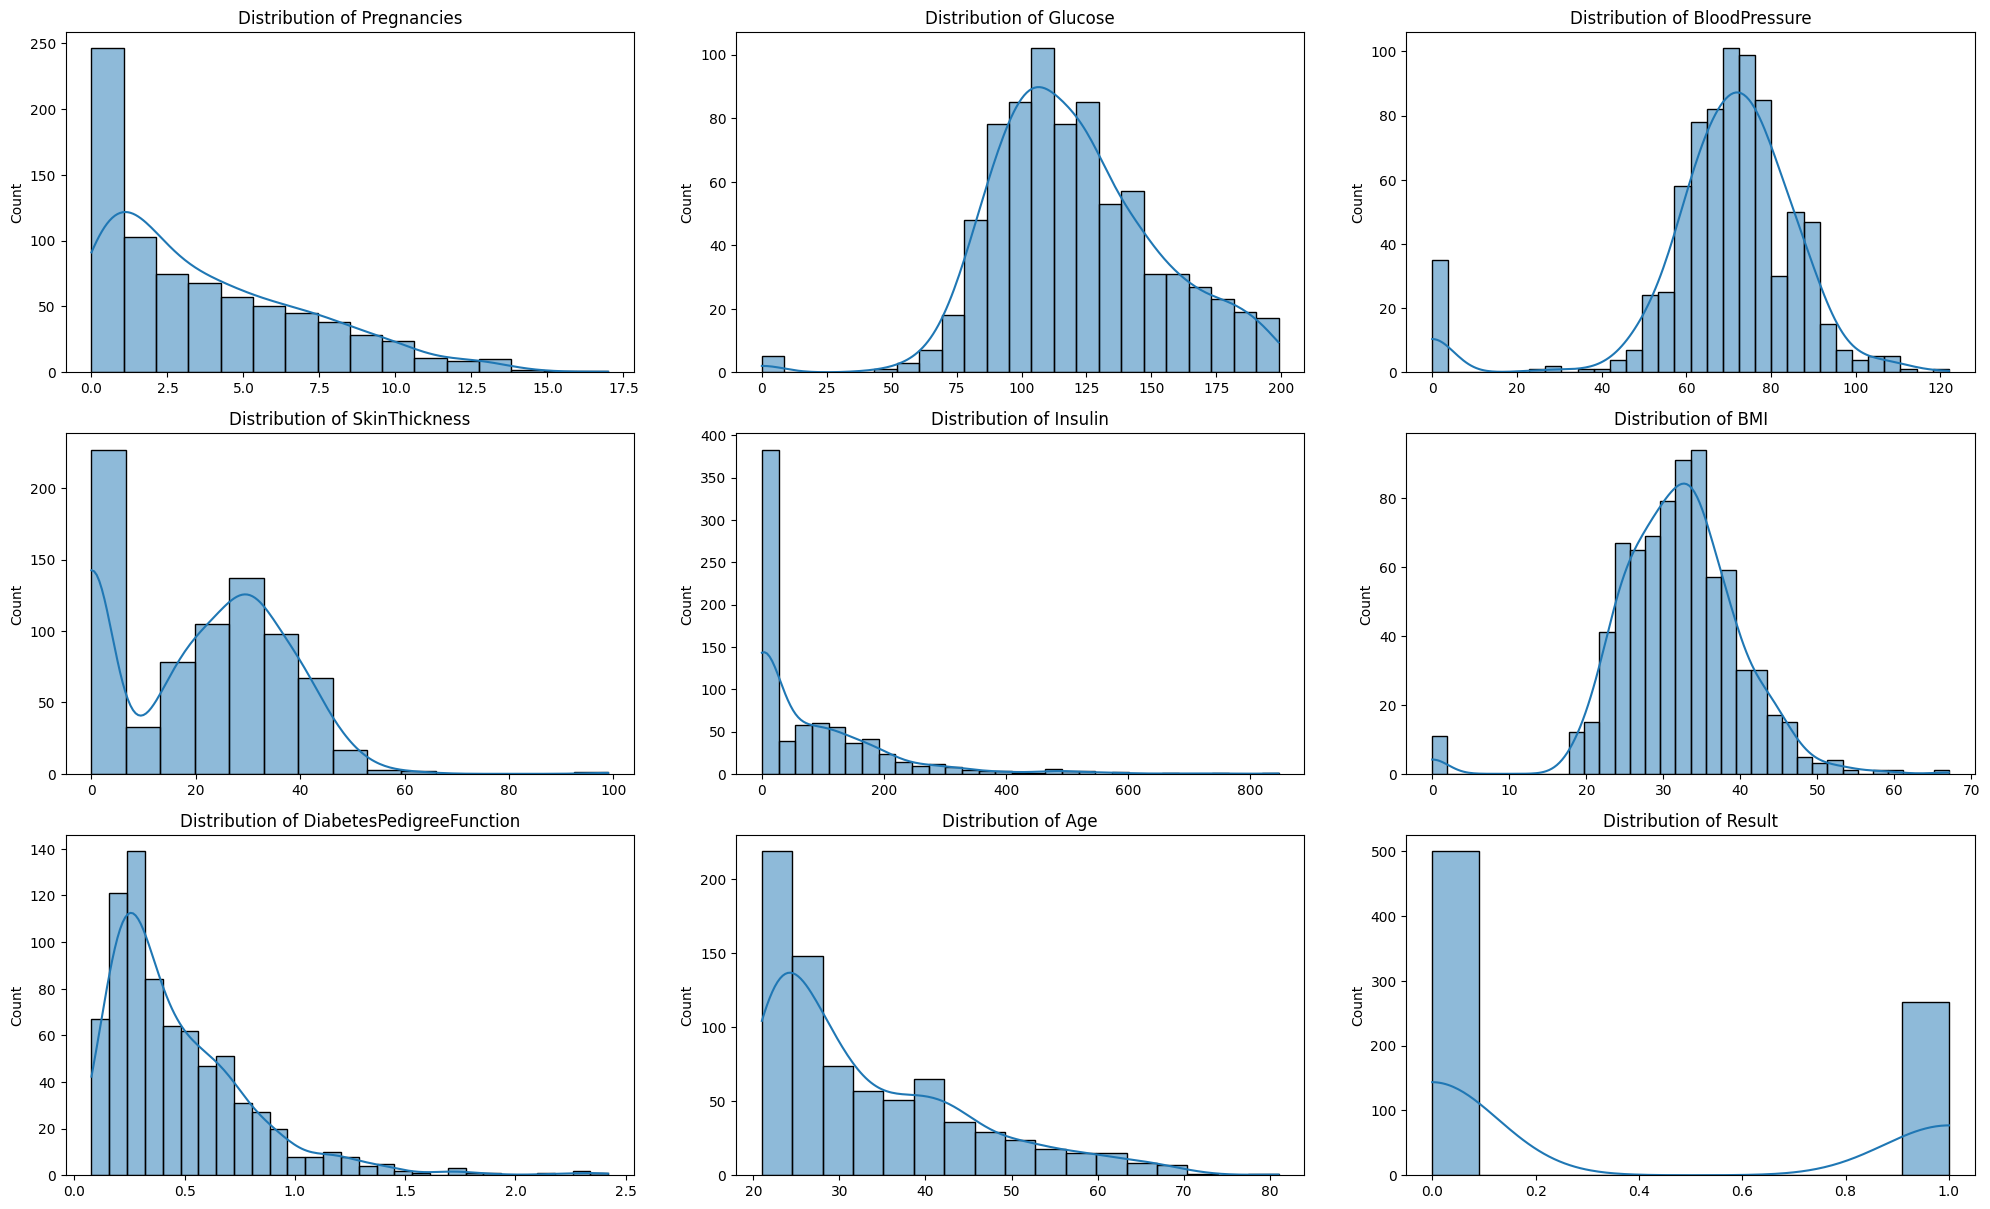

In [9]:
df_cont = diabetes.select_dtypes(np.number) # store all numeric columns in df_cont variable
fig = plt.figure(figsize=(20, 24))  # Increase the figure size to accommodate 16 subplots

for i, columns in enumerate(df_cont.columns): 
    ax = plt.subplot(6, 3, i+1) # creates 3 subplots in one single row
    sns.histplot(x = df_cont[columns], kde=True) # creates kde plots for each feature in df_cont dataset
    ax.set_xlabel(None) # removes the labels on x-axis
    ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plots

since there some zero values in the most of the features, lets see the skewness of the data and choose the right 
filling method, however, the most of these features in right skewed, the mean filling method the prefered.

In [10]:
cols = diabetes.drop(columns=["Pregnancies" ,"Result"]).columns
for i in cols: 
    if i == "Result":
        break
    diabetes[i] = np.where((diabetes[i] == 0), diabetes[i].mean(), diabetes[i])


In [11]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
diabetes[["Pregnancies", "Glucose","BloodPressure","SkinThickness", "Insulin"]] =diabetes[["Pregnancies", "Glucose","BloodPressure","SkinThickness", "Insulin"]].astype(np.int64) 

In [13]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Result                    768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


<Axes: >

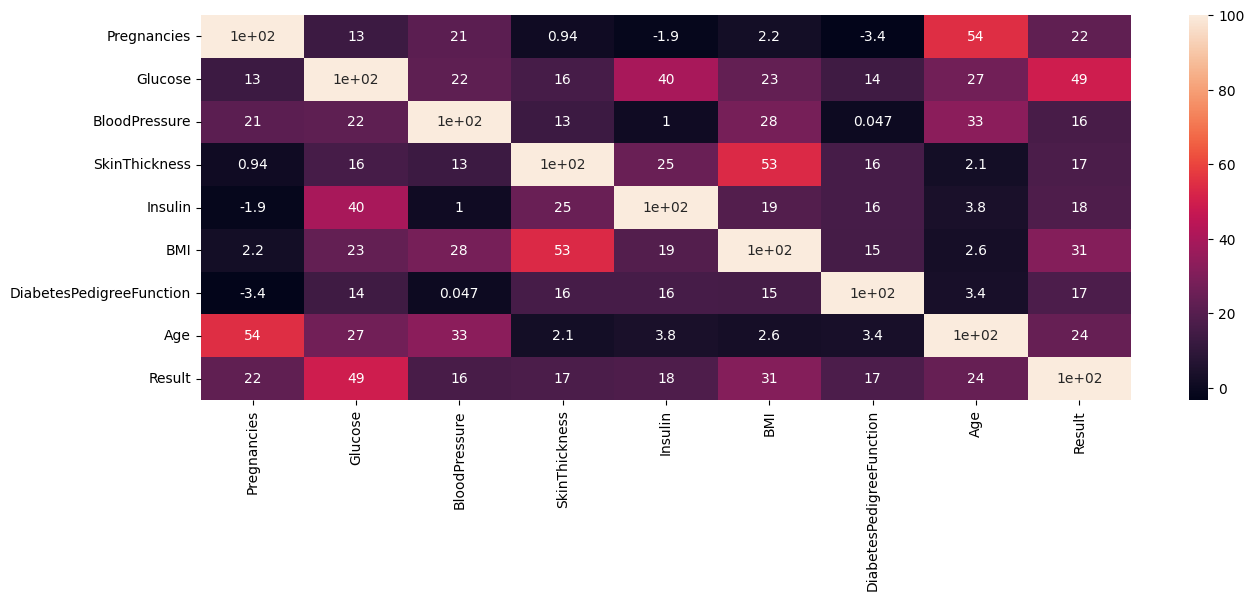

In [14]:
plt.figure(figsize=(15,5))
sns.heatmap(diabetes.corr()*100, annot=True)

<Axes: >

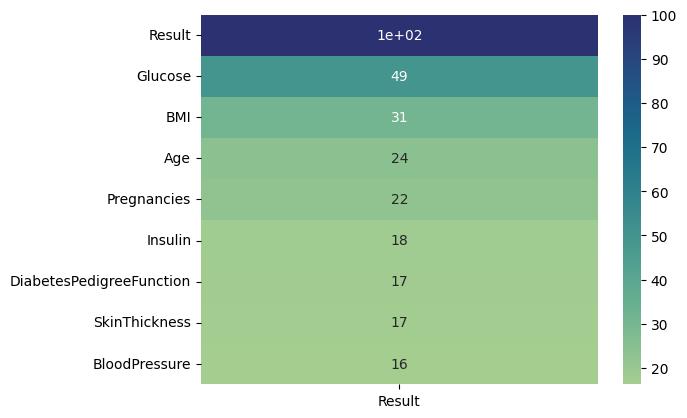

In [15]:
# understand the other features related to the traget
corr = diabetes.corr()["Result"]*100
sns.heatmap(corr.sort_values(ascending=False).to_frame(), annot=True, cmap="crest")

# Data Visualization

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Result'}>]], dtype=object)

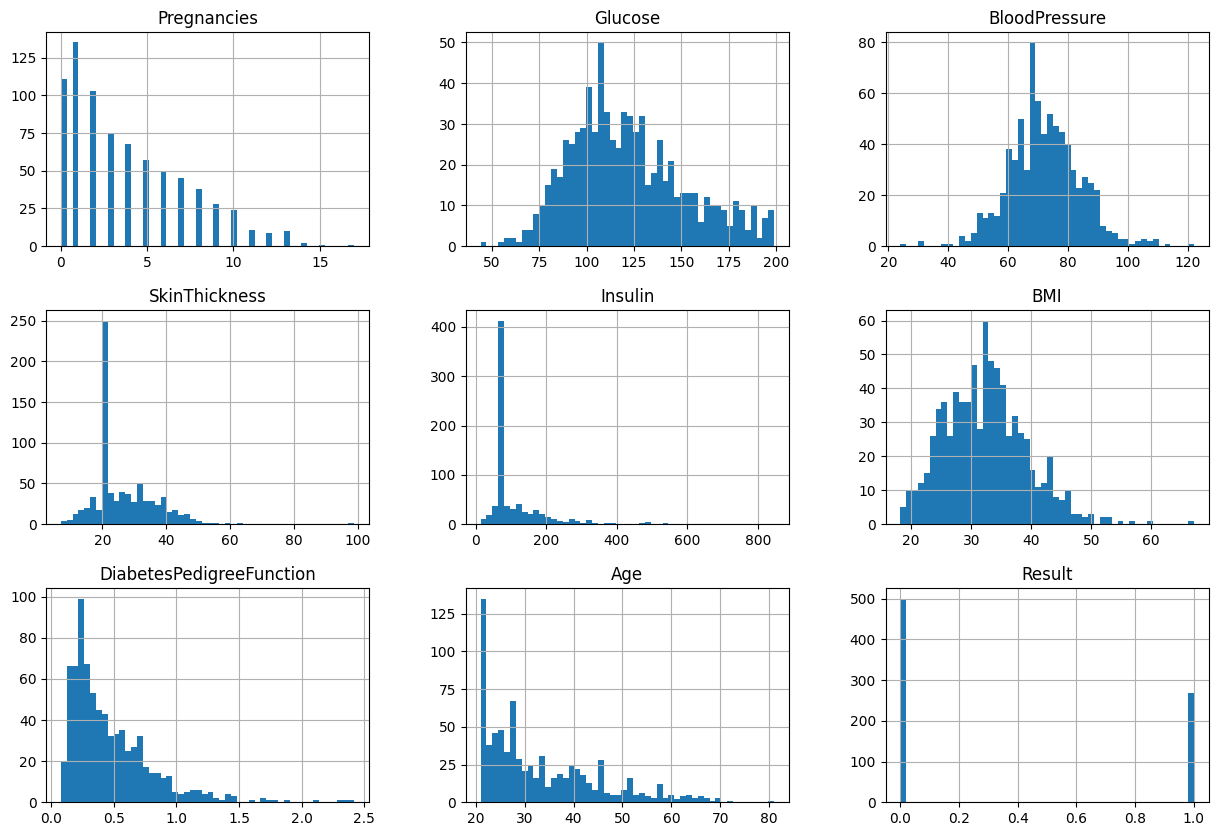

In [16]:
diabetes.hist(figsize=(15,10), bins = 50, grid=True)

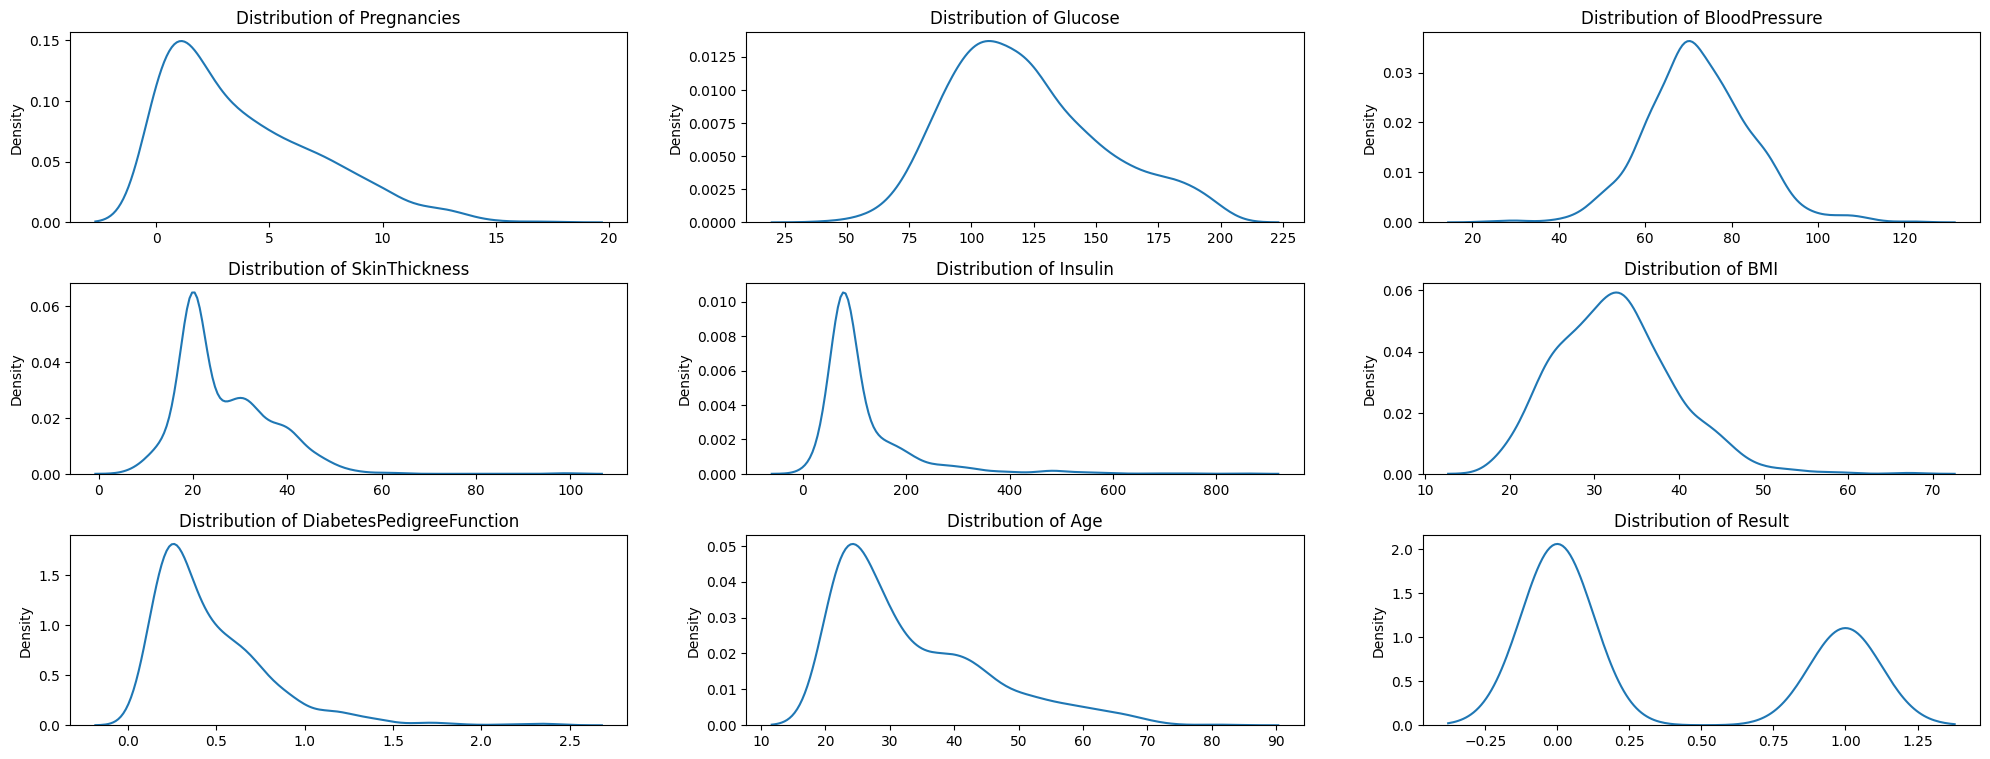

In [17]:
plt.figure(figsize=(20,15))


for i, col in enumerate(diabetes.columns): 
    ax = plt.subplot(6, 3, i+1) 
    sns.kdeplot(x = diabetes[col]) 
    ax.set_xlabel(None) 
    ax.set_title(f'Distribution of {col}') 
    plt.tight_layout(w_pad=3) 
plt.show() 

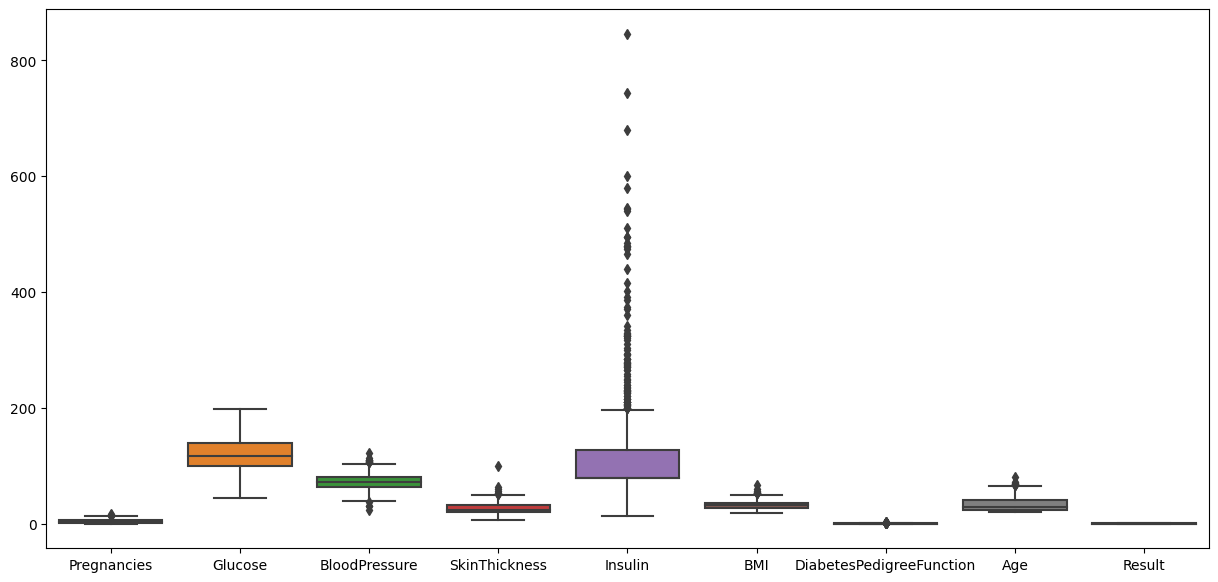

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(diabetes) 
plt.show() 

Result
0    500
1    268
Name: count, dtype: int64


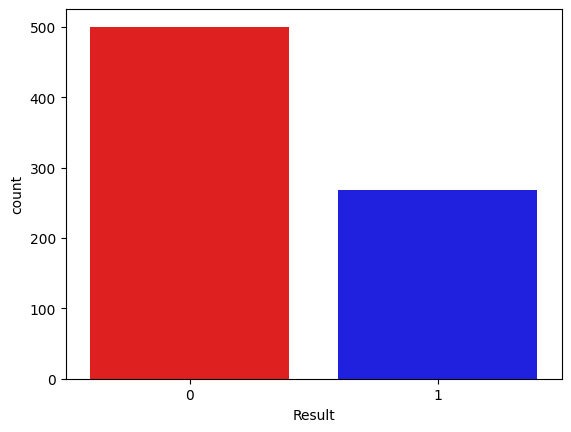

In [19]:
print(diabetes["Result"].value_counts())
sns.countplot(data = diabetes, x = "Result", palette={0:"red", 1:"blue"})
plt.show()

In [20]:
diabetes["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

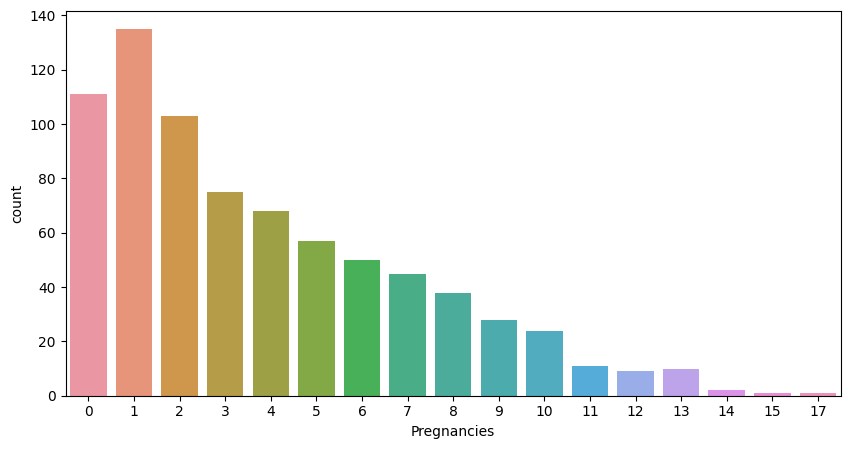

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(data = diabetes, x = "Pregnancies")
plt.show()

In [22]:
feature = diabetes.drop(columns=["Result"]).columns
fixed = []

In [23]:
def outlier_detect(df, features):
    for i in features:
        Q1 = df[i].quantile(.25)
        Q3 = df[i].quantile(.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 + 1.5* IQR
        fixed.append((lower_bound, upper_bound))
    return fixed

In [24]:
outlier_detect(diabetes, feature)

[(-6.5, 13.5),
 (39.0, 201.0),
 (40.0, 104.0),
 (2.0, 50.0),
 (6.625, 199.625),
 (13.849999999999998, 50.25),
 (-0.32999999999999996, 1.2),
 (-1.5, 66.5)]

In [25]:
for feature, value in zip(feature, fixed):
    lower_bound, upper_bound = value
    diabetes[feature] = np.where(diabetes[feature] > upper_bound, upper_bound,
                            np.where(diabetes[feature] < lower_bound, lower_bound, diabetes[feature]))

In [26]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.837240,121.675781,72.221354,26.329427,103.645345,32.388956,0.458914,33.199870,0.348958
std,3.344157,30.436252,11.718024,9.250086,47.263098,6.667633,0.285596,11.628404,0.476951
min,0.000000,44.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,13.500000,199.000000,104.000000,50.000000,199.625000,50.250000,1.200000,66.500000,1.000000


## Re-sampling to balance the data set

In [27]:
diabetes["Result"].value_counts()

Result
0    500
1    268
Name: count, dtype: int64

In [28]:
diabetes_0 = diabetes[(diabetes['Result']==0)] 
diabetes_1 = diabetes[(diabetes['Result']==1)] 

new_diabetes = resample(diabetes_1, 
                                 replace=True,    
                                 n_samples= 500, 
                                 random_state=42) 

diabetes_new = pd.concat([new_diabetes, diabetes_0])


In [29]:
diabetes_new["Result"].value_counts()

Result
1    500
0    500
Name: count, dtype: int64

# Model Building and Evaluation

In [30]:
X = diabetes_new.drop(columns=["Result"])
y = diabetes_new["Result"]
kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [32]:
sc = MinMaxScaler()
#sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train.shape

(700, 8)

In [34]:
# Logistic Regression
log_reg = LogisticRegression()

# RandomForestClassifier
RFC = RandomForestClassifier(criterion = 'gini',n_estimators= 1000, max_depth=7, min_samples_split=10, 
                             min_samples_leaf = 3, n_jobs = -1, random_state= 42) 

# SupportVectorClassifier
svc = SVC(kernel="rbf", C = 5)

# XGBoostClassifier
xgb = XGBClassifier(objective="binary:logistic", random_state=42, learning_rate =0.01,
                    n_estimators=2000, booster = 'gbtree', max_depth=8,subsample=0.7,n_jobs = -1) 
# CatBoostClassifier
cb = CatBoostClassifier(iterations=1000, depth=4, learning_rate=0.1, l2_leaf_reg=1, random_seed=101, thread_count=-1)

### Logistic Regression

Accuracy

In [35]:
accuracy_scores_log = cross_val_score(log_reg, X_train, y_train, cv=kfold, scoring="accuracy")
print(f"Logistic reg accuracy: {round(accuracy_scores_log.mean()*100, 3)} %")

Logistic reg accuracy: 71.857 %


Confusion Matrix

In [36]:
log_reg.fit(X_train, y_train)
y_log_pred = log_reg.predict(X_test)

In [37]:
confusion_matrix(y_test, y_log_pred)

array([[118,  32],
       [ 45, 105]], dtype=int64)

### SVC

Accuracy

In [38]:
accuracy_scores_svc = cross_val_score(svc, X_train, y_train, cv=kfold, scoring="accuracy")
print(f"SVC accuracy: {round(accuracy_scores_svc.mean()*100, 3)} %")

SVC accuracy: 78.286 %


Confusion Matrix

In [39]:
svc.fit(X_train, y_train)
y_svc_pred = svc.predict(X_test)

In [40]:
confusion_matrix(y_test, y_svc_pred)

array([[114,  36],
       [ 27, 123]], dtype=int64)

### Random Forest Classifier

Accuracy

In [41]:
accuracy_scores_rfc = cross_val_score(RFC, X_train, y_train, cv=kfold, scoring="accuracy")
print(f"RFC accuracy: {round(accuracy_scores_rfc.mean()*100, 3)} %")

RFC accuracy: 81.857 %


Confusion Matrix

In [42]:
RFC.fit(X_train, y_train)
y_rfc_pred = RFC.predict(X_test)

In [43]:
(confusion_matrix(y_test, y_rfc_pred))

array([[115,  35],
       [ 18, 132]], dtype=int64)

### XGBoost Classifier

Accuracy

In [44]:
accuracy_scores_xgb = cross_val_score(xgb, X_train, y_train, cv=kfold, scoring="accuracy")
print(f"xgboost accuracy: {round(accuracy_scores_xgb.mean()*100, 3)} %")

xgboost accuracy: 83.714 %


Confusion Matrix

In [45]:
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)

In [46]:
(confusion_matrix(y_test, y_xgb_pred))

array([[122,  28],
       [ 15, 135]], dtype=int64)

### Catboost Classifier

Accuracy

In [49]:
accuracy_scores_cat = cross_val_score(cb, X_train, y_train, cv=kfold, scoring="accuracy")

0:	learn: 0.6426519	total: 136ms	remaining: 2m 15s
1:	learn: 0.6101711	total: 138ms	remaining: 1m 8s
2:	learn: 0.5828477	total: 139ms	remaining: 46.2s
3:	learn: 0.5655561	total: 140ms	remaining: 34.9s
4:	learn: 0.5488554	total: 141ms	remaining: 28.1s
5:	learn: 0.5339142	total: 142ms	remaining: 23.5s
6:	learn: 0.5229959	total: 143ms	remaining: 20.3s
7:	learn: 0.5074497	total: 144ms	remaining: 17.9s
8:	learn: 0.4978770	total: 145ms	remaining: 16s
9:	learn: 0.4901964	total: 146ms	remaining: 14.4s
10:	learn: 0.4821665	total: 147ms	remaining: 13.2s
11:	learn: 0.4729420	total: 148ms	remaining: 12.2s
12:	learn: 0.4642856	total: 149ms	remaining: 11.3s
13:	learn: 0.4549743	total: 150ms	remaining: 10.5s
14:	learn: 0.4490716	total: 151ms	remaining: 9.89s
15:	learn: 0.4412785	total: 152ms	remaining: 9.32s
16:	learn: 0.4369018	total: 153ms	remaining: 8.82s
17:	learn: 0.4308941	total: 154ms	remaining: 8.37s
18:	learn: 0.4281056	total: 154ms	remaining: 7.97s
19:	learn: 0.4233626	total: 155ms	remainin

170:	learn: 0.1276426	total: 325ms	remaining: 1.58s
171:	learn: 0.1264086	total: 327ms	remaining: 1.57s
172:	learn: 0.1256354	total: 328ms	remaining: 1.57s
173:	learn: 0.1246660	total: 329ms	remaining: 1.56s
174:	learn: 0.1239842	total: 330ms	remaining: 1.56s
175:	learn: 0.1233864	total: 332ms	remaining: 1.55s
176:	learn: 0.1224828	total: 333ms	remaining: 1.55s
177:	learn: 0.1211201	total: 334ms	remaining: 1.54s
178:	learn: 0.1203804	total: 335ms	remaining: 1.54s
179:	learn: 0.1190262	total: 337ms	remaining: 1.53s
180:	learn: 0.1177921	total: 338ms	remaining: 1.53s
181:	learn: 0.1167954	total: 339ms	remaining: 1.52s
182:	learn: 0.1159165	total: 341ms	remaining: 1.52s
183:	learn: 0.1150724	total: 342ms	remaining: 1.52s
184:	learn: 0.1135403	total: 343ms	remaining: 1.51s
185:	learn: 0.1121441	total: 344ms	remaining: 1.51s
186:	learn: 0.1113367	total: 346ms	remaining: 1.5s
187:	learn: 0.1107698	total: 347ms	remaining: 1.5s
188:	learn: 0.1096360	total: 348ms	remaining: 1.49s
189:	learn: 0.

331:	learn: 0.0424465	total: 519ms	remaining: 1.04s
332:	learn: 0.0421326	total: 521ms	remaining: 1.04s
333:	learn: 0.0420742	total: 522ms	remaining: 1.04s
334:	learn: 0.0418473	total: 523ms	remaining: 1.04s
335:	learn: 0.0415671	total: 524ms	remaining: 1.03s
336:	learn: 0.0411212	total: 525ms	remaining: 1.03s
337:	learn: 0.0407196	total: 526ms	remaining: 1.03s
338:	learn: 0.0405879	total: 528ms	remaining: 1.03s
339:	learn: 0.0404184	total: 529ms	remaining: 1.03s
340:	learn: 0.0400676	total: 530ms	remaining: 1.02s
341:	learn: 0.0399236	total: 531ms	remaining: 1.02s
342:	learn: 0.0396436	total: 533ms	remaining: 1.02s
343:	learn: 0.0393863	total: 534ms	remaining: 1.02s
344:	learn: 0.0390850	total: 535ms	remaining: 1.01s
345:	learn: 0.0389636	total: 536ms	remaining: 1.01s
346:	learn: 0.0388796	total: 538ms	remaining: 1.01s
347:	learn: 0.0387268	total: 539ms	remaining: 1.01s
348:	learn: 0.0385064	total: 540ms	remaining: 1.01s
349:	learn: 0.0382547	total: 541ms	remaining: 1s
350:	learn: 0.0

496:	learn: 0.0194365	total: 712ms	remaining: 721ms
497:	learn: 0.0193795	total: 714ms	remaining: 719ms
498:	learn: 0.0192827	total: 715ms	remaining: 718ms
499:	learn: 0.0190774	total: 716ms	remaining: 716ms
500:	learn: 0.0189927	total: 717ms	remaining: 714ms
501:	learn: 0.0188762	total: 718ms	remaining: 713ms
502:	learn: 0.0188139	total: 720ms	remaining: 711ms
503:	learn: 0.0187788	total: 721ms	remaining: 710ms
504:	learn: 0.0186464	total: 722ms	remaining: 708ms
505:	learn: 0.0185927	total: 723ms	remaining: 706ms
506:	learn: 0.0184648	total: 725ms	remaining: 705ms
507:	learn: 0.0183880	total: 726ms	remaining: 703ms
508:	learn: 0.0182822	total: 727ms	remaining: 701ms
509:	learn: 0.0181633	total: 728ms	remaining: 700ms
510:	learn: 0.0180966	total: 729ms	remaining: 698ms
511:	learn: 0.0180269	total: 731ms	remaining: 696ms
512:	learn: 0.0179424	total: 732ms	remaining: 695ms
513:	learn: 0.0178945	total: 733ms	remaining: 693ms
514:	learn: 0.0177956	total: 734ms	remaining: 692ms
515:	learn: 

658:	learn: 0.0108786	total: 904ms	remaining: 468ms
659:	learn: 0.0108529	total: 906ms	remaining: 467ms
660:	learn: 0.0108281	total: 907ms	remaining: 465ms
661:	learn: 0.0107983	total: 908ms	remaining: 464ms
662:	learn: 0.0107983	total: 910ms	remaining: 462ms
663:	learn: 0.0107769	total: 911ms	remaining: 461ms
664:	learn: 0.0107488	total: 912ms	remaining: 460ms
665:	learn: 0.0107290	total: 914ms	remaining: 458ms
666:	learn: 0.0106975	total: 915ms	remaining: 457ms
667:	learn: 0.0106558	total: 916ms	remaining: 455ms
668:	learn: 0.0106476	total: 918ms	remaining: 454ms
669:	learn: 0.0106220	total: 919ms	remaining: 453ms
670:	learn: 0.0105986	total: 920ms	remaining: 451ms
671:	learn: 0.0105826	total: 922ms	remaining: 450ms
672:	learn: 0.0105437	total: 923ms	remaining: 449ms
673:	learn: 0.0105125	total: 924ms	remaining: 447ms
674:	learn: 0.0104423	total: 926ms	remaining: 446ms
675:	learn: 0.0103924	total: 927ms	remaining: 444ms
676:	learn: 0.0103714	total: 928ms	remaining: 443ms
677:	learn: 

828:	learn: 0.0074601	total: 1.1s	remaining: 226ms
829:	learn: 0.0074414	total: 1.1s	remaining: 225ms
830:	learn: 0.0074308	total: 1.1s	remaining: 224ms
831:	learn: 0.0074306	total: 1.1s	remaining: 222ms
832:	learn: 0.0074306	total: 1.1s	remaining: 221ms
833:	learn: 0.0074307	total: 1.1s	remaining: 220ms
834:	learn: 0.0074307	total: 1.1s	remaining: 218ms
835:	learn: 0.0074306	total: 1.1s	remaining: 217ms
836:	learn: 0.0074227	total: 1.11s	remaining: 215ms
837:	learn: 0.0074106	total: 1.11s	remaining: 214ms
838:	learn: 0.0073966	total: 1.11s	remaining: 213ms
839:	learn: 0.0073657	total: 1.11s	remaining: 211ms
840:	learn: 0.0073488	total: 1.11s	remaining: 210ms
841:	learn: 0.0073225	total: 1.11s	remaining: 209ms
842:	learn: 0.0072916	total: 1.11s	remaining: 208ms
843:	learn: 0.0072622	total: 1.11s	remaining: 206ms
844:	learn: 0.0072371	total: 1.12s	remaining: 205ms
845:	learn: 0.0072274	total: 1.12s	remaining: 204ms
846:	learn: 0.0071901	total: 1.12s	remaining: 202ms
847:	learn: 0.007163

0:	learn: 0.6476033	total: 1.09ms	remaining: 1.09s
1:	learn: 0.6231060	total: 2.15ms	remaining: 1.07s
2:	learn: 0.5975999	total: 3.09ms	remaining: 1.03s
3:	learn: 0.5776940	total: 3.96ms	remaining: 985ms
4:	learn: 0.5643757	total: 4.9ms	remaining: 975ms
5:	learn: 0.5494888	total: 5.81ms	remaining: 963ms
6:	learn: 0.5354105	total: 6.74ms	remaining: 957ms
7:	learn: 0.5203551	total: 7.68ms	remaining: 953ms
8:	learn: 0.5094043	total: 8.59ms	remaining: 946ms
9:	learn: 0.4990278	total: 9.5ms	remaining: 941ms
10:	learn: 0.4891466	total: 10.4ms	remaining: 938ms
11:	learn: 0.4802085	total: 11.4ms	remaining: 935ms
12:	learn: 0.4712907	total: 12.3ms	remaining: 936ms
13:	learn: 0.4610746	total: 13.2ms	remaining: 933ms
14:	learn: 0.4546403	total: 14.2ms	remaining: 935ms
15:	learn: 0.4499322	total: 15.2ms	remaining: 933ms
16:	learn: 0.4469910	total: 16.1ms	remaining: 930ms
17:	learn: 0.4411448	total: 17ms	remaining: 929ms
18:	learn: 0.4355563	total: 18ms	remaining: 927ms
19:	learn: 0.4310378	total: 

166:	learn: 0.1338906	total: 194ms	remaining: 968ms
167:	learn: 0.1328273	total: 195ms	remaining: 968ms
168:	learn: 0.1318998	total: 197ms	remaining: 966ms
169:	learn: 0.1309518	total: 198ms	remaining: 965ms
170:	learn: 0.1301790	total: 199ms	remaining: 964ms
171:	learn: 0.1291385	total: 200ms	remaining: 963ms
172:	learn: 0.1283423	total: 201ms	remaining: 963ms
173:	learn: 0.1277869	total: 203ms	remaining: 962ms
174:	learn: 0.1272247	total: 204ms	remaining: 962ms
175:	learn: 0.1264455	total: 206ms	remaining: 962ms
176:	learn: 0.1252179	total: 207ms	remaining: 961ms
177:	learn: 0.1249840	total: 208ms	remaining: 960ms
178:	learn: 0.1244656	total: 209ms	remaining: 959ms
179:	learn: 0.1239293	total: 210ms	remaining: 958ms
180:	learn: 0.1229412	total: 211ms	remaining: 956ms
181:	learn: 0.1221252	total: 213ms	remaining: 955ms
182:	learn: 0.1214987	total: 214ms	remaining: 954ms
183:	learn: 0.1207084	total: 215ms	remaining: 952ms
184:	learn: 0.1196628	total: 216ms	remaining: 951ms
185:	learn: 

334:	learn: 0.0479194	total: 387ms	remaining: 768ms
335:	learn: 0.0477080	total: 388ms	remaining: 767ms
336:	learn: 0.0474892	total: 389ms	remaining: 766ms
337:	learn: 0.0471989	total: 390ms	remaining: 765ms
338:	learn: 0.0470007	total: 392ms	remaining: 763ms
339:	learn: 0.0468057	total: 393ms	remaining: 762ms
340:	learn: 0.0464833	total: 394ms	remaining: 761ms
341:	learn: 0.0462103	total: 395ms	remaining: 760ms
342:	learn: 0.0461108	total: 396ms	remaining: 759ms
343:	learn: 0.0459496	total: 398ms	remaining: 758ms
344:	learn: 0.0457909	total: 399ms	remaining: 757ms
345:	learn: 0.0454640	total: 400ms	remaining: 756ms
346:	learn: 0.0452992	total: 401ms	remaining: 755ms
347:	learn: 0.0449991	total: 403ms	remaining: 754ms
348:	learn: 0.0446297	total: 404ms	remaining: 753ms
349:	learn: 0.0443966	total: 405ms	remaining: 753ms
350:	learn: 0.0441336	total: 407ms	remaining: 752ms
351:	learn: 0.0439509	total: 408ms	remaining: 751ms
352:	learn: 0.0438198	total: 409ms	remaining: 750ms
353:	learn: 

496:	learn: 0.0232025	total: 579ms	remaining: 586ms
497:	learn: 0.0231095	total: 580ms	remaining: 585ms
498:	learn: 0.0230346	total: 582ms	remaining: 584ms
499:	learn: 0.0229474	total: 583ms	remaining: 583ms
500:	learn: 0.0228888	total: 584ms	remaining: 582ms
501:	learn: 0.0227346	total: 585ms	remaining: 581ms
502:	learn: 0.0226761	total: 586ms	remaining: 579ms
503:	learn: 0.0224577	total: 588ms	remaining: 578ms
504:	learn: 0.0223404	total: 589ms	remaining: 577ms
505:	learn: 0.0221639	total: 590ms	remaining: 576ms
506:	learn: 0.0220256	total: 591ms	remaining: 575ms
507:	learn: 0.0219265	total: 593ms	remaining: 574ms
508:	learn: 0.0218787	total: 594ms	remaining: 573ms
509:	learn: 0.0218142	total: 595ms	remaining: 572ms
510:	learn: 0.0217458	total: 596ms	remaining: 571ms
511:	learn: 0.0216812	total: 597ms	remaining: 569ms
512:	learn: 0.0215327	total: 599ms	remaining: 568ms
513:	learn: 0.0215009	total: 600ms	remaining: 567ms
514:	learn: 0.0214184	total: 601ms	remaining: 566ms
515:	learn: 

665:	learn: 0.0125923	total: 769ms	remaining: 386ms
666:	learn: 0.0125337	total: 771ms	remaining: 385ms
667:	learn: 0.0124477	total: 772ms	remaining: 384ms
668:	learn: 0.0124048	total: 773ms	remaining: 383ms
669:	learn: 0.0123928	total: 774ms	remaining: 381ms
670:	learn: 0.0123387	total: 776ms	remaining: 380ms
671:	learn: 0.0123055	total: 777ms	remaining: 379ms
672:	learn: 0.0122840	total: 778ms	remaining: 378ms
673:	learn: 0.0122251	total: 780ms	remaining: 377ms
674:	learn: 0.0121922	total: 781ms	remaining: 376ms
675:	learn: 0.0121715	total: 782ms	remaining: 375ms
676:	learn: 0.0121252	total: 783ms	remaining: 374ms
677:	learn: 0.0121062	total: 785ms	remaining: 373ms
678:	learn: 0.0120721	total: 786ms	remaining: 372ms
679:	learn: 0.0120284	total: 787ms	remaining: 370ms
680:	learn: 0.0120012	total: 788ms	remaining: 369ms
681:	learn: 0.0119710	total: 790ms	remaining: 368ms
682:	learn: 0.0119482	total: 791ms	remaining: 367ms
683:	learn: 0.0118941	total: 792ms	remaining: 366ms
684:	learn: 

838:	learn: 0.0080389	total: 962ms	remaining: 185ms
839:	learn: 0.0080105	total: 964ms	remaining: 184ms
840:	learn: 0.0080003	total: 965ms	remaining: 182ms
841:	learn: 0.0079610	total: 966ms	remaining: 181ms
842:	learn: 0.0079586	total: 967ms	remaining: 180ms
843:	learn: 0.0079499	total: 968ms	remaining: 179ms
844:	learn: 0.0079499	total: 969ms	remaining: 178ms
845:	learn: 0.0079243	total: 970ms	remaining: 177ms
846:	learn: 0.0079195	total: 972ms	remaining: 175ms
847:	learn: 0.0078922	total: 973ms	remaining: 174ms
848:	learn: 0.0078664	total: 974ms	remaining: 173ms
849:	learn: 0.0078447	total: 975ms	remaining: 172ms
850:	learn: 0.0078311	total: 977ms	remaining: 171ms
851:	learn: 0.0078311	total: 978ms	remaining: 170ms
852:	learn: 0.0078161	total: 979ms	remaining: 169ms
853:	learn: 0.0078033	total: 980ms	remaining: 168ms
854:	learn: 0.0077807	total: 981ms	remaining: 166ms
855:	learn: 0.0077526	total: 982ms	remaining: 165ms
856:	learn: 0.0077445	total: 983ms	remaining: 164ms
857:	learn: 

0:	learn: 0.6591742	total: 1.94ms	remaining: 1.94s
1:	learn: 0.6341362	total: 3.54ms	remaining: 1.77s
2:	learn: 0.6060286	total: 6.19ms	remaining: 2.06s
3:	learn: 0.5916952	total: 8.25ms	remaining: 2.05s
4:	learn: 0.5702596	total: 9.92ms	remaining: 1.97s
5:	learn: 0.5590865	total: 11.4ms	remaining: 1.88s
6:	learn: 0.5484015	total: 12.3ms	remaining: 1.74s
7:	learn: 0.5333879	total: 13.2ms	remaining: 1.64s
8:	learn: 0.5256394	total: 14.1ms	remaining: 1.55s
9:	learn: 0.5170674	total: 15ms	remaining: 1.49s
10:	learn: 0.5085559	total: 15.9ms	remaining: 1.43s
11:	learn: 0.4980530	total: 16.8ms	remaining: 1.38s
12:	learn: 0.4899843	total: 17.7ms	remaining: 1.34s
13:	learn: 0.4803902	total: 18.6ms	remaining: 1.31s
14:	learn: 0.4751763	total: 19.5ms	remaining: 1.28s
15:	learn: 0.4693148	total: 20.4ms	remaining: 1.26s
16:	learn: 0.4642330	total: 21.4ms	remaining: 1.24s
17:	learn: 0.4576604	total: 22.3ms	remaining: 1.22s
18:	learn: 0.4541900	total: 23.2ms	remaining: 1.2s
19:	learn: 0.4502836	tota

171:	learn: 0.1431678	total: 200ms	remaining: 963ms
172:	learn: 0.1415121	total: 202ms	remaining: 964ms
173:	learn: 0.1403106	total: 203ms	remaining: 963ms
174:	learn: 0.1384522	total: 204ms	remaining: 962ms
175:	learn: 0.1374990	total: 205ms	remaining: 961ms
176:	learn: 0.1366680	total: 207ms	remaining: 961ms
177:	learn: 0.1362586	total: 208ms	remaining: 960ms
178:	learn: 0.1354319	total: 209ms	remaining: 960ms
179:	learn: 0.1340228	total: 211ms	remaining: 961ms
180:	learn: 0.1333241	total: 212ms	remaining: 960ms
181:	learn: 0.1329156	total: 213ms	remaining: 959ms
182:	learn: 0.1321918	total: 215ms	remaining: 959ms
183:	learn: 0.1314306	total: 216ms	remaining: 958ms
184:	learn: 0.1307732	total: 217ms	remaining: 957ms
185:	learn: 0.1300156	total: 218ms	remaining: 955ms
186:	learn: 0.1284954	total: 219ms	remaining: 954ms
187:	learn: 0.1272346	total: 221ms	remaining: 954ms
188:	learn: 0.1265064	total: 222ms	remaining: 952ms
189:	learn: 0.1258686	total: 223ms	remaining: 951ms
190:	learn: 

335:	learn: 0.0509132	total: 392ms	remaining: 775ms
336:	learn: 0.0506071	total: 394ms	remaining: 774ms
337:	learn: 0.0502333	total: 395ms	remaining: 774ms
338:	learn: 0.0500751	total: 396ms	remaining: 773ms
339:	learn: 0.0498085	total: 398ms	remaining: 772ms
340:	learn: 0.0495786	total: 399ms	remaining: 771ms
341:	learn: 0.0494790	total: 400ms	remaining: 770ms
342:	learn: 0.0492496	total: 401ms	remaining: 769ms
343:	learn: 0.0490258	total: 403ms	remaining: 768ms
344:	learn: 0.0487806	total: 404ms	remaining: 768ms
345:	learn: 0.0485998	total: 406ms	remaining: 767ms
346:	learn: 0.0483658	total: 407ms	remaining: 766ms
347:	learn: 0.0479517	total: 408ms	remaining: 765ms
348:	learn: 0.0478269	total: 409ms	remaining: 764ms
349:	learn: 0.0477032	total: 411ms	remaining: 763ms
350:	learn: 0.0473622	total: 412ms	remaining: 761ms
351:	learn: 0.0472028	total: 413ms	remaining: 760ms
352:	learn: 0.0469040	total: 414ms	remaining: 759ms
353:	learn: 0.0465683	total: 415ms	remaining: 758ms
354:	learn: 

493:	learn: 0.0240681	total: 583ms	remaining: 597ms
494:	learn: 0.0239935	total: 585ms	remaining: 596ms
495:	learn: 0.0238972	total: 586ms	remaining: 595ms
496:	learn: 0.0238163	total: 587ms	remaining: 594ms
497:	learn: 0.0238078	total: 589ms	remaining: 593ms
498:	learn: 0.0237250	total: 590ms	remaining: 592ms
499:	learn: 0.0236812	total: 591ms	remaining: 591ms
500:	learn: 0.0236479	total: 592ms	remaining: 590ms
501:	learn: 0.0236148	total: 594ms	remaining: 589ms
502:	learn: 0.0235010	total: 595ms	remaining: 588ms
503:	learn: 0.0234301	total: 596ms	remaining: 587ms
504:	learn: 0.0232406	total: 597ms	remaining: 586ms
505:	learn: 0.0231542	total: 599ms	remaining: 585ms
506:	learn: 0.0229463	total: 600ms	remaining: 583ms
507:	learn: 0.0228723	total: 601ms	remaining: 582ms
508:	learn: 0.0226863	total: 602ms	remaining: 581ms
509:	learn: 0.0225837	total: 603ms	remaining: 580ms
510:	learn: 0.0224968	total: 604ms	remaining: 578ms
511:	learn: 0.0224359	total: 606ms	remaining: 577ms
512:	learn: 

654:	learn: 0.0131604	total: 772ms	remaining: 407ms
655:	learn: 0.0131304	total: 774ms	remaining: 406ms
656:	learn: 0.0130892	total: 775ms	remaining: 405ms
657:	learn: 0.0130235	total: 776ms	remaining: 403ms
658:	learn: 0.0129749	total: 778ms	remaining: 402ms
659:	learn: 0.0129321	total: 779ms	remaining: 401ms
660:	learn: 0.0128899	total: 780ms	remaining: 400ms
661:	learn: 0.0128676	total: 781ms	remaining: 399ms
662:	learn: 0.0127736	total: 783ms	remaining: 398ms
663:	learn: 0.0127637	total: 784ms	remaining: 397ms
664:	learn: 0.0126990	total: 785ms	remaining: 396ms
665:	learn: 0.0126678	total: 787ms	remaining: 394ms
666:	learn: 0.0126229	total: 788ms	remaining: 393ms
667:	learn: 0.0126105	total: 789ms	remaining: 392ms
668:	learn: 0.0125054	total: 790ms	remaining: 391ms
669:	learn: 0.0124878	total: 792ms	remaining: 390ms
670:	learn: 0.0124616	total: 793ms	remaining: 389ms
671:	learn: 0.0124216	total: 794ms	remaining: 388ms
672:	learn: 0.0123796	total: 795ms	remaining: 386ms
673:	learn: 

820:	learn: 0.0085954	total: 965ms	remaining: 210ms
821:	learn: 0.0085758	total: 966ms	remaining: 209ms
822:	learn: 0.0085654	total: 967ms	remaining: 208ms
823:	learn: 0.0085652	total: 968ms	remaining: 207ms
824:	learn: 0.0085118	total: 970ms	remaining: 206ms
825:	learn: 0.0085012	total: 971ms	remaining: 204ms
826:	learn: 0.0084885	total: 972ms	remaining: 203ms
827:	learn: 0.0084696	total: 973ms	remaining: 202ms
828:	learn: 0.0084502	total: 974ms	remaining: 201ms
829:	learn: 0.0084066	total: 976ms	remaining: 200ms
830:	learn: 0.0083951	total: 977ms	remaining: 199ms
831:	learn: 0.0083482	total: 978ms	remaining: 198ms
832:	learn: 0.0083226	total: 980ms	remaining: 196ms
833:	learn: 0.0083226	total: 981ms	remaining: 195ms
834:	learn: 0.0082844	total: 982ms	remaining: 194ms
835:	learn: 0.0082844	total: 983ms	remaining: 193ms
836:	learn: 0.0082844	total: 984ms	remaining: 192ms
837:	learn: 0.0082843	total: 985ms	remaining: 190ms
838:	learn: 0.0082570	total: 986ms	remaining: 189ms
839:	learn: 

0:	learn: 0.6450676	total: 1.04ms	remaining: 1.04s
1:	learn: 0.6184850	total: 1.96ms	remaining: 978ms
2:	learn: 0.5913331	total: 2.92ms	remaining: 972ms
3:	learn: 0.5716975	total: 3.82ms	remaining: 952ms
4:	learn: 0.5528464	total: 4.76ms	remaining: 947ms
5:	learn: 0.5405717	total: 5.66ms	remaining: 937ms
6:	learn: 0.5311748	total: 6.59ms	remaining: 935ms
7:	learn: 0.5147947	total: 7.51ms	remaining: 931ms
8:	learn: 0.5062411	total: 8.45ms	remaining: 931ms
9:	learn: 0.4949432	total: 9.41ms	remaining: 931ms
10:	learn: 0.4878215	total: 10.3ms	remaining: 929ms
11:	learn: 0.4777884	total: 11.3ms	remaining: 931ms
12:	learn: 0.4716424	total: 12.3ms	remaining: 931ms
13:	learn: 0.4621700	total: 13.2ms	remaining: 929ms
14:	learn: 0.4527612	total: 14.1ms	remaining: 927ms
15:	learn: 0.4464251	total: 15.1ms	remaining: 927ms
16:	learn: 0.4426621	total: 16.1ms	remaining: 931ms
17:	learn: 0.4391936	total: 17.1ms	remaining: 933ms
18:	learn: 0.4330454	total: 18.2ms	remaining: 938ms
19:	learn: 0.4260971	t

168:	learn: 0.1269312	total: 200ms	remaining: 983ms
169:	learn: 0.1260816	total: 201ms	remaining: 983ms
170:	learn: 0.1254214	total: 202ms	remaining: 981ms
171:	learn: 0.1248132	total: 204ms	remaining: 980ms
172:	learn: 0.1237639	total: 205ms	remaining: 979ms
173:	learn: 0.1220450	total: 206ms	remaining: 977ms
174:	learn: 0.1208853	total: 207ms	remaining: 976ms
175:	learn: 0.1202709	total: 208ms	remaining: 976ms
176:	learn: 0.1191026	total: 210ms	remaining: 975ms
177:	learn: 0.1181858	total: 211ms	remaining: 975ms
178:	learn: 0.1170887	total: 212ms	remaining: 973ms
179:	learn: 0.1166344	total: 213ms	remaining: 972ms
180:	learn: 0.1158144	total: 215ms	remaining: 971ms
181:	learn: 0.1144839	total: 216ms	remaining: 970ms
182:	learn: 0.1137866	total: 217ms	remaining: 969ms
183:	learn: 0.1128804	total: 218ms	remaining: 968ms
184:	learn: 0.1118295	total: 220ms	remaining: 967ms
185:	learn: 0.1112735	total: 221ms	remaining: 966ms
186:	learn: 0.1107814	total: 222ms	remaining: 965ms
187:	learn: 

332:	learn: 0.0445607	total: 394ms	remaining: 790ms
333:	learn: 0.0441943	total: 396ms	remaining: 790ms
334:	learn: 0.0440231	total: 397ms	remaining: 788ms
335:	learn: 0.0437533	total: 398ms	remaining: 787ms
336:	learn: 0.0433880	total: 400ms	remaining: 786ms
337:	learn: 0.0430722	total: 401ms	remaining: 785ms
338:	learn: 0.0429658	total: 402ms	remaining: 784ms
339:	learn: 0.0425819	total: 403ms	remaining: 783ms
340:	learn: 0.0423542	total: 405ms	remaining: 782ms
341:	learn: 0.0421180	total: 406ms	remaining: 781ms
342:	learn: 0.0419388	total: 407ms	remaining: 780ms
343:	learn: 0.0416143	total: 409ms	remaining: 779ms
344:	learn: 0.0413848	total: 410ms	remaining: 779ms
345:	learn: 0.0411883	total: 411ms	remaining: 778ms
346:	learn: 0.0409655	total: 413ms	remaining: 777ms
347:	learn: 0.0406348	total: 414ms	remaining: 776ms
348:	learn: 0.0403645	total: 416ms	remaining: 775ms
349:	learn: 0.0401932	total: 417ms	remaining: 774ms
350:	learn: 0.0400174	total: 418ms	remaining: 773ms
351:	learn: 

491:	learn: 0.0200639	total: 586ms	remaining: 605ms
492:	learn: 0.0200326	total: 587ms	remaining: 604ms
493:	learn: 0.0199439	total: 588ms	remaining: 603ms
494:	learn: 0.0198852	total: 590ms	remaining: 602ms
495:	learn: 0.0198150	total: 591ms	remaining: 601ms
496:	learn: 0.0197402	total: 592ms	remaining: 600ms
497:	learn: 0.0196569	total: 594ms	remaining: 598ms
498:	learn: 0.0195599	total: 595ms	remaining: 597ms
499:	learn: 0.0194511	total: 596ms	remaining: 596ms
500:	learn: 0.0193897	total: 598ms	remaining: 595ms
501:	learn: 0.0193220	total: 599ms	remaining: 594ms
502:	learn: 0.0192464	total: 600ms	remaining: 593ms
503:	learn: 0.0191064	total: 601ms	remaining: 592ms
504:	learn: 0.0189799	total: 603ms	remaining: 591ms
505:	learn: 0.0189035	total: 604ms	remaining: 590ms
506:	learn: 0.0188395	total: 605ms	remaining: 588ms
507:	learn: 0.0187650	total: 606ms	remaining: 587ms
508:	learn: 0.0187153	total: 607ms	remaining: 586ms
509:	learn: 0.0185855	total: 609ms	remaining: 585ms
510:	learn: 

649:	learn: 0.0112871	total: 775ms	remaining: 417ms
650:	learn: 0.0112633	total: 776ms	remaining: 416ms
651:	learn: 0.0112107	total: 778ms	remaining: 415ms
652:	learn: 0.0111765	total: 779ms	remaining: 414ms
653:	learn: 0.0111221	total: 780ms	remaining: 413ms
654:	learn: 0.0110697	total: 781ms	remaining: 412ms
655:	learn: 0.0110293	total: 782ms	remaining: 410ms
656:	learn: 0.0110015	total: 784ms	remaining: 409ms
657:	learn: 0.0109452	total: 785ms	remaining: 408ms
658:	learn: 0.0109166	total: 786ms	remaining: 407ms
659:	learn: 0.0108919	total: 788ms	remaining: 406ms
660:	learn: 0.0108778	total: 789ms	remaining: 405ms
661:	learn: 0.0107963	total: 790ms	remaining: 403ms
662:	learn: 0.0107739	total: 791ms	remaining: 402ms
663:	learn: 0.0107334	total: 793ms	remaining: 401ms
664:	learn: 0.0106986	total: 794ms	remaining: 400ms
665:	learn: 0.0106841	total: 795ms	remaining: 399ms
666:	learn: 0.0106398	total: 796ms	remaining: 397ms
667:	learn: 0.0105811	total: 797ms	remaining: 396ms
668:	learn: 

816:	learn: 0.0072402	total: 967ms	remaining: 217ms
817:	learn: 0.0072401	total: 969ms	remaining: 216ms
818:	learn: 0.0072218	total: 970ms	remaining: 214ms
819:	learn: 0.0072116	total: 972ms	remaining: 213ms
820:	learn: 0.0072116	total: 973ms	remaining: 212ms
821:	learn: 0.0071972	total: 974ms	remaining: 211ms
822:	learn: 0.0071456	total: 975ms	remaining: 210ms
823:	learn: 0.0071218	total: 977ms	remaining: 209ms
824:	learn: 0.0070857	total: 978ms	remaining: 207ms
825:	learn: 0.0070693	total: 980ms	remaining: 206ms
826:	learn: 0.0070425	total: 981ms	remaining: 205ms
827:	learn: 0.0070298	total: 982ms	remaining: 204ms
828:	learn: 0.0070149	total: 983ms	remaining: 203ms
829:	learn: 0.0069469	total: 985ms	remaining: 202ms
830:	learn: 0.0069266	total: 986ms	remaining: 201ms
831:	learn: 0.0068983	total: 987ms	remaining: 199ms
832:	learn: 0.0068693	total: 988ms	remaining: 198ms
833:	learn: 0.0068689	total: 989ms	remaining: 197ms
834:	learn: 0.0068689	total: 990ms	remaining: 196ms
835:	learn: 

0:	learn: 0.6482468	total: 1.8ms	remaining: 1.8s
1:	learn: 0.6262531	total: 3.41ms	remaining: 1.7s
2:	learn: 0.5916816	total: 4.65ms	remaining: 1.54s
3:	learn: 0.5723942	total: 5.78ms	remaining: 1.44s
4:	learn: 0.5572929	total: 6.82ms	remaining: 1.36s
5:	learn: 0.5514209	total: 7.84ms	remaining: 1.3s
6:	learn: 0.5297282	total: 8.9ms	remaining: 1.26s
7:	learn: 0.5179673	total: 9.93ms	remaining: 1.23s
8:	learn: 0.5037849	total: 11ms	remaining: 1.21s
9:	learn: 0.4928008	total: 12ms	remaining: 1.19s
10:	learn: 0.4816951	total: 13ms	remaining: 1.17s
11:	learn: 0.4708579	total: 14.1ms	remaining: 1.16s
12:	learn: 0.4663666	total: 15.1ms	remaining: 1.15s
13:	learn: 0.4615072	total: 16.1ms	remaining: 1.14s
14:	learn: 0.4540615	total: 17.2ms	remaining: 1.13s
15:	learn: 0.4484462	total: 18.3ms	remaining: 1.12s
16:	learn: 0.4427419	total: 19.4ms	remaining: 1.12s
17:	learn: 0.4400185	total: 20.5ms	remaining: 1.12s
18:	learn: 0.4322867	total: 21.6ms	remaining: 1.12s
19:	learn: 0.4268520	total: 22.7m

315:	learn: 0.0520516	total: 368ms	remaining: 797ms
316:	learn: 0.0515670	total: 369ms	remaining: 796ms
317:	learn: 0.0509531	total: 371ms	remaining: 795ms
318:	learn: 0.0505520	total: 372ms	remaining: 794ms
319:	learn: 0.0503310	total: 373ms	remaining: 793ms
320:	learn: 0.0501034	total: 374ms	remaining: 792ms
321:	learn: 0.0496725	total: 376ms	remaining: 791ms
322:	learn: 0.0494708	total: 377ms	remaining: 790ms
323:	learn: 0.0491975	total: 378ms	remaining: 789ms
324:	learn: 0.0489772	total: 379ms	remaining: 788ms
325:	learn: 0.0486895	total: 380ms	remaining: 787ms
326:	learn: 0.0484515	total: 382ms	remaining: 786ms
327:	learn: 0.0480965	total: 383ms	remaining: 785ms
328:	learn: 0.0476946	total: 385ms	remaining: 785ms
329:	learn: 0.0473078	total: 386ms	remaining: 784ms
330:	learn: 0.0469723	total: 387ms	remaining: 782ms
331:	learn: 0.0467151	total: 388ms	remaining: 782ms
332:	learn: 0.0464371	total: 390ms	remaining: 780ms
333:	learn: 0.0462497	total: 391ms	remaining: 779ms
334:	learn: 

480:	learn: 0.0230827	total: 560ms	remaining: 604ms
481:	learn: 0.0230057	total: 562ms	remaining: 603ms
482:	learn: 0.0228825	total: 563ms	remaining: 602ms
483:	learn: 0.0227587	total: 564ms	remaining: 601ms
484:	learn: 0.0227052	total: 565ms	remaining: 600ms
485:	learn: 0.0225236	total: 566ms	remaining: 599ms
486:	learn: 0.0224130	total: 568ms	remaining: 598ms
487:	learn: 0.0223130	total: 569ms	remaining: 597ms
488:	learn: 0.0221605	total: 570ms	remaining: 596ms
489:	learn: 0.0220994	total: 571ms	remaining: 594ms
490:	learn: 0.0220396	total: 572ms	remaining: 593ms
491:	learn: 0.0219025	total: 574ms	remaining: 592ms
492:	learn: 0.0218493	total: 575ms	remaining: 591ms
493:	learn: 0.0217405	total: 576ms	remaining: 590ms
494:	learn: 0.0216340	total: 577ms	remaining: 589ms
495:	learn: 0.0215637	total: 579ms	remaining: 588ms
496:	learn: 0.0214044	total: 580ms	remaining: 587ms
497:	learn: 0.0213414	total: 581ms	remaining: 585ms
498:	learn: 0.0212119	total: 582ms	remaining: 584ms
499:	learn: 

644:	learn: 0.0127906	total: 752ms	remaining: 414ms
645:	learn: 0.0127454	total: 754ms	remaining: 413ms
646:	learn: 0.0127231	total: 755ms	remaining: 412ms
647:	learn: 0.0126926	total: 757ms	remaining: 411ms
648:	learn: 0.0126270	total: 758ms	remaining: 410ms
649:	learn: 0.0125494	total: 759ms	remaining: 409ms
650:	learn: 0.0125299	total: 761ms	remaining: 408ms
651:	learn: 0.0125123	total: 762ms	remaining: 407ms
652:	learn: 0.0124999	total: 763ms	remaining: 406ms
653:	learn: 0.0124522	total: 765ms	remaining: 404ms
654:	learn: 0.0123791	total: 766ms	remaining: 403ms
655:	learn: 0.0123260	total: 767ms	remaining: 402ms
656:	learn: 0.0122834	total: 769ms	remaining: 401ms
657:	learn: 0.0122280	total: 770ms	remaining: 400ms
658:	learn: 0.0121776	total: 771ms	remaining: 399ms
659:	learn: 0.0121381	total: 773ms	remaining: 398ms
660:	learn: 0.0121186	total: 774ms	remaining: 397ms
661:	learn: 0.0120676	total: 775ms	remaining: 396ms
662:	learn: 0.0120108	total: 776ms	remaining: 395ms
663:	learn: 

804:	learn: 0.0080944	total: 943ms	remaining: 228ms
805:	learn: 0.0080741	total: 945ms	remaining: 227ms
806:	learn: 0.0080645	total: 946ms	remaining: 226ms
807:	learn: 0.0080645	total: 947ms	remaining: 225ms
808:	learn: 0.0080484	total: 948ms	remaining: 224ms
809:	learn: 0.0080483	total: 949ms	remaining: 223ms
810:	learn: 0.0080306	total: 950ms	remaining: 221ms
811:	learn: 0.0079958	total: 952ms	remaining: 220ms
812:	learn: 0.0079904	total: 953ms	remaining: 219ms
813:	learn: 0.0079866	total: 954ms	remaining: 218ms
814:	learn: 0.0079745	total: 955ms	remaining: 217ms
815:	learn: 0.0079512	total: 956ms	remaining: 216ms
816:	learn: 0.0079233	total: 958ms	remaining: 214ms
817:	learn: 0.0078848	total: 959ms	remaining: 213ms
818:	learn: 0.0078696	total: 960ms	remaining: 212ms
819:	learn: 0.0078696	total: 961ms	remaining: 211ms
820:	learn: 0.0078499	total: 962ms	remaining: 210ms
821:	learn: 0.0078457	total: 963ms	remaining: 209ms
822:	learn: 0.0078457	total: 964ms	remaining: 207ms
823:	learn: 

983:	learn: 0.0063075	total: 1.13s	remaining: 18.4ms
984:	learn: 0.0062785	total: 1.13s	remaining: 17.2ms
985:	learn: 0.0062523	total: 1.13s	remaining: 16.1ms
986:	learn: 0.0062523	total: 1.13s	remaining: 14.9ms
987:	learn: 0.0062523	total: 1.13s	remaining: 13.8ms
988:	learn: 0.0062523	total: 1.13s	remaining: 12.6ms
989:	learn: 0.0062523	total: 1.14s	remaining: 11.5ms
990:	learn: 0.0062523	total: 1.14s	remaining: 10.3ms
991:	learn: 0.0062523	total: 1.14s	remaining: 9.17ms
992:	learn: 0.0062523	total: 1.14s	remaining: 8.02ms
993:	learn: 0.0062368	total: 1.14s	remaining: 6.88ms
994:	learn: 0.0062367	total: 1.14s	remaining: 5.73ms
995:	learn: 0.0062367	total: 1.14s	remaining: 4.58ms
996:	learn: 0.0062367	total: 1.14s	remaining: 3.44ms
997:	learn: 0.0062367	total: 1.14s	remaining: 2.29ms
998:	learn: 0.0062366	total: 1.14s	remaining: 1.15ms
999:	learn: 0.0062251	total: 1.15s	remaining: 0us
0:	learn: 0.6441138	total: 1.22ms	remaining: 1.22s
1:	learn: 0.6089644	total: 2.39ms	remaining: 1.19s


287:	learn: 0.0624019	total: 340ms	remaining: 842ms
288:	learn: 0.0622413	total: 342ms	remaining: 841ms
289:	learn: 0.0617799	total: 343ms	remaining: 840ms
290:	learn: 0.0615245	total: 344ms	remaining: 839ms
291:	learn: 0.0610634	total: 346ms	remaining: 838ms
292:	learn: 0.0608785	total: 347ms	remaining: 837ms
293:	learn: 0.0606790	total: 348ms	remaining: 836ms
294:	learn: 0.0600219	total: 349ms	remaining: 834ms
295:	learn: 0.0598023	total: 350ms	remaining: 833ms
296:	learn: 0.0596254	total: 351ms	remaining: 832ms
297:	learn: 0.0590284	total: 353ms	remaining: 831ms
298:	learn: 0.0587066	total: 354ms	remaining: 830ms
299:	learn: 0.0584784	total: 355ms	remaining: 829ms
300:	learn: 0.0580550	total: 356ms	remaining: 828ms
301:	learn: 0.0576797	total: 358ms	remaining: 826ms
302:	learn: 0.0570743	total: 359ms	remaining: 825ms
303:	learn: 0.0566027	total: 360ms	remaining: 824ms
304:	learn: 0.0562381	total: 361ms	remaining: 822ms
305:	learn: 0.0557964	total: 362ms	remaining: 821ms
306:	learn: 

453:	learn: 0.0269731	total: 534ms	remaining: 643ms
454:	learn: 0.0267301	total: 536ms	remaining: 642ms
455:	learn: 0.0266260	total: 537ms	remaining: 641ms
456:	learn: 0.0265798	total: 538ms	remaining: 639ms
457:	learn: 0.0263585	total: 539ms	remaining: 638ms
458:	learn: 0.0263222	total: 540ms	remaining: 637ms
459:	learn: 0.0261952	total: 541ms	remaining: 636ms
460:	learn: 0.0259935	total: 543ms	remaining: 634ms
461:	learn: 0.0259104	total: 544ms	remaining: 633ms
462:	learn: 0.0257772	total: 545ms	remaining: 632ms
463:	learn: 0.0256794	total: 546ms	remaining: 631ms
464:	learn: 0.0255644	total: 547ms	remaining: 630ms
465:	learn: 0.0254879	total: 549ms	remaining: 629ms
466:	learn: 0.0254129	total: 550ms	remaining: 628ms
467:	learn: 0.0253088	total: 551ms	remaining: 627ms
468:	learn: 0.0252813	total: 552ms	remaining: 625ms
469:	learn: 0.0252028	total: 553ms	remaining: 624ms
470:	learn: 0.0250835	total: 555ms	remaining: 623ms
471:	learn: 0.0250123	total: 556ms	remaining: 622ms
472:	learn: 

621:	learn: 0.0142175	total: 727ms	remaining: 442ms
622:	learn: 0.0141845	total: 729ms	remaining: 441ms
623:	learn: 0.0141182	total: 730ms	remaining: 440ms
624:	learn: 0.0140839	total: 732ms	remaining: 439ms
625:	learn: 0.0140655	total: 733ms	remaining: 438ms
626:	learn: 0.0140285	total: 734ms	remaining: 437ms
627:	learn: 0.0139995	total: 735ms	remaining: 435ms
628:	learn: 0.0139186	total: 736ms	remaining: 434ms
629:	learn: 0.0138545	total: 738ms	remaining: 433ms
630:	learn: 0.0138345	total: 739ms	remaining: 432ms
631:	learn: 0.0137931	total: 740ms	remaining: 431ms
632:	learn: 0.0137754	total: 741ms	remaining: 430ms
633:	learn: 0.0137371	total: 742ms	remaining: 429ms
634:	learn: 0.0137237	total: 743ms	remaining: 427ms
635:	learn: 0.0136925	total: 745ms	remaining: 426ms
636:	learn: 0.0136697	total: 746ms	remaining: 425ms
637:	learn: 0.0136445	total: 747ms	remaining: 424ms
638:	learn: 0.0135742	total: 748ms	remaining: 422ms
639:	learn: 0.0135474	total: 749ms	remaining: 421ms
640:	learn: 

784:	learn: 0.0090544	total: 917ms	remaining: 251ms
785:	learn: 0.0090473	total: 919ms	remaining: 250ms
786:	learn: 0.0089711	total: 920ms	remaining: 249ms
787:	learn: 0.0089514	total: 921ms	remaining: 248ms
788:	learn: 0.0089259	total: 922ms	remaining: 247ms
789:	learn: 0.0089143	total: 923ms	remaining: 245ms
790:	learn: 0.0089021	total: 924ms	remaining: 244ms
791:	learn: 0.0089020	total: 925ms	remaining: 243ms
792:	learn: 0.0088868	total: 927ms	remaining: 242ms
793:	learn: 0.0088868	total: 928ms	remaining: 241ms
794:	learn: 0.0088722	total: 929ms	remaining: 240ms
795:	learn: 0.0088723	total: 930ms	remaining: 238ms
796:	learn: 0.0088624	total: 931ms	remaining: 237ms
797:	learn: 0.0088171	total: 933ms	remaining: 236ms
798:	learn: 0.0088169	total: 934ms	remaining: 235ms
799:	learn: 0.0088061	total: 935ms	remaining: 234ms
800:	learn: 0.0087876	total: 936ms	remaining: 233ms
801:	learn: 0.0087478	total: 937ms	remaining: 231ms
802:	learn: 0.0086995	total: 939ms	remaining: 230ms
803:	learn: 

958:	learn: 0.0069090	total: 1.1s	remaining: 47.2ms
959:	learn: 0.0069029	total: 1.11s	remaining: 46.1ms
960:	learn: 0.0069029	total: 1.11s	remaining: 44.9ms
961:	learn: 0.0069029	total: 1.11s	remaining: 43.8ms
962:	learn: 0.0069029	total: 1.11s	remaining: 42.6ms
963:	learn: 0.0069029	total: 1.11s	remaining: 41.5ms
964:	learn: 0.0069029	total: 1.11s	remaining: 40.3ms
965:	learn: 0.0069027	total: 1.11s	remaining: 39.1ms
966:	learn: 0.0069026	total: 1.11s	remaining: 38ms
967:	learn: 0.0069026	total: 1.11s	remaining: 36.8ms
968:	learn: 0.0069026	total: 1.11s	remaining: 35.7ms
969:	learn: 0.0069025	total: 1.12s	remaining: 34.5ms
970:	learn: 0.0069025	total: 1.12s	remaining: 33.4ms
971:	learn: 0.0069026	total: 1.12s	remaining: 32.2ms
972:	learn: 0.0069025	total: 1.12s	remaining: 31.1ms
973:	learn: 0.0069026	total: 1.12s	remaining: 29.9ms
974:	learn: 0.0069025	total: 1.12s	remaining: 28.7ms
975:	learn: 0.0068792	total: 1.12s	remaining: 27.6ms
976:	learn: 0.0068544	total: 1.12s	remaining: 26.

266:	learn: 0.0638163	total: 317ms	remaining: 869ms
267:	learn: 0.0635227	total: 318ms	remaining: 870ms
268:	learn: 0.0632616	total: 320ms	remaining: 869ms
269:	learn: 0.0629959	total: 321ms	remaining: 868ms
270:	learn: 0.0623272	total: 323ms	remaining: 868ms
271:	learn: 0.0619738	total: 324ms	remaining: 867ms
272:	learn: 0.0617407	total: 326ms	remaining: 867ms
273:	learn: 0.0614446	total: 327ms	remaining: 866ms
274:	learn: 0.0612353	total: 328ms	remaining: 865ms
275:	learn: 0.0608230	total: 330ms	remaining: 865ms
276:	learn: 0.0604499	total: 331ms	remaining: 864ms
277:	learn: 0.0602771	total: 333ms	remaining: 864ms
278:	learn: 0.0598802	total: 334ms	remaining: 864ms
279:	learn: 0.0596605	total: 336ms	remaining: 863ms
280:	learn: 0.0590529	total: 337ms	remaining: 862ms
281:	learn: 0.0589088	total: 338ms	remaining: 861ms
282:	learn: 0.0586717	total: 340ms	remaining: 860ms
283:	learn: 0.0582922	total: 341ms	remaining: 859ms
284:	learn: 0.0580301	total: 342ms	remaining: 858ms
285:	learn: 

585:	learn: 0.0146330	total: 705ms	remaining: 498ms
586:	learn: 0.0145612	total: 706ms	remaining: 497ms
587:	learn: 0.0145425	total: 708ms	remaining: 496ms
588:	learn: 0.0145175	total: 709ms	remaining: 495ms
589:	learn: 0.0144991	total: 710ms	remaining: 494ms
590:	learn: 0.0144418	total: 711ms	remaining: 492ms
591:	learn: 0.0144064	total: 713ms	remaining: 491ms
592:	learn: 0.0143783	total: 714ms	remaining: 490ms
593:	learn: 0.0143024	total: 715ms	remaining: 489ms
594:	learn: 0.0142816	total: 716ms	remaining: 487ms
595:	learn: 0.0142084	total: 717ms	remaining: 486ms
596:	learn: 0.0141703	total: 719ms	remaining: 485ms
597:	learn: 0.0141398	total: 720ms	remaining: 484ms
598:	learn: 0.0140994	total: 721ms	remaining: 483ms
599:	learn: 0.0140971	total: 722ms	remaining: 482ms
600:	learn: 0.0140671	total: 724ms	remaining: 480ms
601:	learn: 0.0140256	total: 725ms	remaining: 479ms
602:	learn: 0.0140251	total: 726ms	remaining: 478ms
603:	learn: 0.0139735	total: 727ms	remaining: 477ms
604:	learn: 

745:	learn: 0.0091534	total: 896ms	remaining: 305ms
746:	learn: 0.0091260	total: 897ms	remaining: 304ms
747:	learn: 0.0090638	total: 899ms	remaining: 303ms
748:	learn: 0.0090425	total: 900ms	remaining: 302ms
749:	learn: 0.0090230	total: 901ms	remaining: 300ms
750:	learn: 0.0090094	total: 902ms	remaining: 299ms
751:	learn: 0.0090016	total: 903ms	remaining: 298ms
752:	learn: 0.0089817	total: 904ms	remaining: 297ms
753:	learn: 0.0089609	total: 906ms	remaining: 295ms
754:	learn: 0.0089430	total: 907ms	remaining: 294ms
755:	learn: 0.0089289	total: 908ms	remaining: 293ms
756:	learn: 0.0089130	total: 910ms	remaining: 292ms
757:	learn: 0.0088989	total: 911ms	remaining: 291ms
758:	learn: 0.0088685	total: 912ms	remaining: 290ms
759:	learn: 0.0088298	total: 913ms	remaining: 288ms
760:	learn: 0.0088003	total: 914ms	remaining: 287ms
761:	learn: 0.0088003	total: 915ms	remaining: 286ms
762:	learn: 0.0088003	total: 916ms	remaining: 285ms
763:	learn: 0.0087762	total: 918ms	remaining: 283ms
764:	learn: 

920:	learn: 0.0066011	total: 1.09s	remaining: 93.3ms
921:	learn: 0.0066011	total: 1.09s	remaining: 92.1ms
922:	learn: 0.0065985	total: 1.09s	remaining: 90.9ms
923:	learn: 0.0065871	total: 1.09s	remaining: 89.7ms
924:	learn: 0.0065726	total: 1.09s	remaining: 88.5ms
925:	learn: 0.0065723	total: 1.09s	remaining: 87.3ms
926:	learn: 0.0065723	total: 1.09s	remaining: 86.1ms
927:	learn: 0.0065722	total: 1.09s	remaining: 85ms
928:	learn: 0.0065722	total: 1.09s	remaining: 83.8ms
929:	learn: 0.0065721	total: 1.1s	remaining: 82.6ms
930:	learn: 0.0065722	total: 1.1s	remaining: 81.4ms
931:	learn: 0.0065693	total: 1.1s	remaining: 80.2ms
932:	learn: 0.0065645	total: 1.1s	remaining: 79ms
933:	learn: 0.0065512	total: 1.1s	remaining: 77.8ms
934:	learn: 0.0065509	total: 1.1s	remaining: 76.7ms
935:	learn: 0.0065508	total: 1.1s	remaining: 75.5ms
936:	learn: 0.0065504	total: 1.1s	remaining: 74.3ms
937:	learn: 0.0065113	total: 1.11s	remaining: 73.1ms
938:	learn: 0.0065112	total: 1.11s	remaining: 71.9ms
939:	

228:	learn: 0.0849148	total: 272ms	remaining: 917ms
229:	learn: 0.0843362	total: 274ms	remaining: 916ms
230:	learn: 0.0838057	total: 275ms	remaining: 916ms
231:	learn: 0.0832217	total: 276ms	remaining: 915ms
232:	learn: 0.0822023	total: 278ms	remaining: 914ms
233:	learn: 0.0817743	total: 279ms	remaining: 913ms
234:	learn: 0.0811025	total: 280ms	remaining: 912ms
235:	learn: 0.0803068	total: 281ms	remaining: 910ms
236:	learn: 0.0800190	total: 282ms	remaining: 909ms
237:	learn: 0.0795956	total: 284ms	remaining: 909ms
238:	learn: 0.0791649	total: 285ms	remaining: 908ms
239:	learn: 0.0785529	total: 286ms	remaining: 907ms
240:	learn: 0.0781243	total: 288ms	remaining: 906ms
241:	learn: 0.0774072	total: 289ms	remaining: 906ms
242:	learn: 0.0769850	total: 290ms	remaining: 905ms
243:	learn: 0.0764508	total: 292ms	remaining: 904ms
244:	learn: 0.0760990	total: 293ms	remaining: 902ms
245:	learn: 0.0754601	total: 294ms	remaining: 901ms
246:	learn: 0.0748639	total: 295ms	remaining: 900ms
247:	learn: 

390:	learn: 0.0330201	total: 464ms	remaining: 723ms
391:	learn: 0.0327828	total: 466ms	remaining: 723ms
392:	learn: 0.0326062	total: 467ms	remaining: 722ms
393:	learn: 0.0323082	total: 469ms	remaining: 721ms
394:	learn: 0.0321793	total: 470ms	remaining: 720ms
395:	learn: 0.0320918	total: 472ms	remaining: 719ms
396:	learn: 0.0319072	total: 473ms	remaining: 719ms
397:	learn: 0.0317382	total: 474ms	remaining: 718ms
398:	learn: 0.0315817	total: 476ms	remaining: 717ms
399:	learn: 0.0313257	total: 477ms	remaining: 716ms
400:	learn: 0.0311287	total: 478ms	remaining: 715ms
401:	learn: 0.0310218	total: 480ms	remaining: 714ms
402:	learn: 0.0307534	total: 481ms	remaining: 712ms
403:	learn: 0.0306362	total: 482ms	remaining: 711ms
404:	learn: 0.0304525	total: 483ms	remaining: 710ms
405:	learn: 0.0302119	total: 485ms	remaining: 709ms
406:	learn: 0.0300725	total: 486ms	remaining: 708ms
407:	learn: 0.0299844	total: 487ms	remaining: 707ms
408:	learn: 0.0298617	total: 488ms	remaining: 706ms
409:	learn: 

550:	learn: 0.0158281	total: 659ms	remaining: 537ms
551:	learn: 0.0157700	total: 660ms	remaining: 536ms
552:	learn: 0.0157213	total: 662ms	remaining: 535ms
553:	learn: 0.0156211	total: 663ms	remaining: 534ms
554:	learn: 0.0155683	total: 664ms	remaining: 533ms
555:	learn: 0.0155103	total: 665ms	remaining: 531ms
556:	learn: 0.0154149	total: 667ms	remaining: 530ms
557:	learn: 0.0153245	total: 668ms	remaining: 529ms
558:	learn: 0.0152832	total: 669ms	remaining: 528ms
559:	learn: 0.0152463	total: 670ms	remaining: 527ms
560:	learn: 0.0152097	total: 671ms	remaining: 525ms
561:	learn: 0.0150823	total: 673ms	remaining: 524ms
562:	learn: 0.0150126	total: 674ms	remaining: 523ms
563:	learn: 0.0149364	total: 675ms	remaining: 522ms
564:	learn: 0.0148329	total: 676ms	remaining: 521ms
565:	learn: 0.0147814	total: 677ms	remaining: 519ms
566:	learn: 0.0147433	total: 679ms	remaining: 518ms
567:	learn: 0.0146719	total: 680ms	remaining: 517ms
568:	learn: 0.0146508	total: 681ms	remaining: 516ms
569:	learn: 

714:	learn: 0.0095314	total: 850ms	remaining: 339ms
715:	learn: 0.0095144	total: 852ms	remaining: 338ms
716:	learn: 0.0094982	total: 853ms	remaining: 337ms
717:	learn: 0.0094749	total: 854ms	remaining: 335ms
718:	learn: 0.0094623	total: 855ms	remaining: 334ms
719:	learn: 0.0094479	total: 856ms	remaining: 333ms
720:	learn: 0.0094177	total: 857ms	remaining: 332ms
721:	learn: 0.0094135	total: 859ms	remaining: 331ms
722:	learn: 0.0094135	total: 859ms	remaining: 329ms
723:	learn: 0.0094060	total: 861ms	remaining: 328ms
724:	learn: 0.0093541	total: 862ms	remaining: 327ms
725:	learn: 0.0093239	total: 863ms	remaining: 326ms
726:	learn: 0.0093239	total: 864ms	remaining: 325ms
727:	learn: 0.0093237	total: 865ms	remaining: 323ms
728:	learn: 0.0093042	total: 866ms	remaining: 322ms
729:	learn: 0.0092668	total: 868ms	remaining: 321ms
730:	learn: 0.0092526	total: 869ms	remaining: 320ms
731:	learn: 0.0092049	total: 870ms	remaining: 318ms
732:	learn: 0.0091776	total: 871ms	remaining: 317ms
733:	learn: 

887:	learn: 0.0070601	total: 1.04s	remaining: 131ms
888:	learn: 0.0070562	total: 1.04s	remaining: 130ms
889:	learn: 0.0070406	total: 1.04s	remaining: 129ms
890:	learn: 0.0070406	total: 1.04s	remaining: 128ms
891:	learn: 0.0070392	total: 1.04s	remaining: 126ms
892:	learn: 0.0070007	total: 1.04s	remaining: 125ms
893:	learn: 0.0070006	total: 1.04s	remaining: 124ms
894:	learn: 0.0069983	total: 1.05s	remaining: 123ms
895:	learn: 0.0069983	total: 1.05s	remaining: 122ms
896:	learn: 0.0069983	total: 1.05s	remaining: 120ms
897:	learn: 0.0069982	total: 1.05s	remaining: 119ms
898:	learn: 0.0069982	total: 1.05s	remaining: 118ms
899:	learn: 0.0069958	total: 1.05s	remaining: 117ms
900:	learn: 0.0069802	total: 1.05s	remaining: 116ms
901:	learn: 0.0069705	total: 1.05s	remaining: 115ms
902:	learn: 0.0069554	total: 1.05s	remaining: 113ms
903:	learn: 0.0069553	total: 1.06s	remaining: 112ms
904:	learn: 0.0069553	total: 1.06s	remaining: 111ms
905:	learn: 0.0069552	total: 1.06s	remaining: 110ms
906:	learn: 

181:	learn: 0.1225193	total: 235ms	remaining: 1.06s
182:	learn: 0.1206330	total: 236ms	remaining: 1.05s
183:	learn: 0.1197756	total: 238ms	remaining: 1.05s
184:	learn: 0.1191533	total: 239ms	remaining: 1.05s
185:	learn: 0.1186901	total: 240ms	remaining: 1.05s
186:	learn: 0.1180748	total: 242ms	remaining: 1.05s
187:	learn: 0.1177247	total: 243ms	remaining: 1.05s
188:	learn: 0.1174401	total: 244ms	remaining: 1.05s
189:	learn: 0.1165743	total: 245ms	remaining: 1.04s
190:	learn: 0.1162749	total: 247ms	remaining: 1.04s
191:	learn: 0.1152996	total: 248ms	remaining: 1.04s
192:	learn: 0.1143990	total: 250ms	remaining: 1.04s
193:	learn: 0.1138148	total: 251ms	remaining: 1.04s
194:	learn: 0.1124169	total: 253ms	remaining: 1.04s
195:	learn: 0.1113255	total: 255ms	remaining: 1.04s
196:	learn: 0.1105023	total: 256ms	remaining: 1.04s
197:	learn: 0.1100582	total: 258ms	remaining: 1.04s
198:	learn: 0.1095842	total: 259ms	remaining: 1.04s
199:	learn: 0.1083635	total: 261ms	remaining: 1.04s
200:	learn: 

472:	learn: 0.0254998	total: 618ms	remaining: 689ms
473:	learn: 0.0253786	total: 620ms	remaining: 688ms
474:	learn: 0.0252204	total: 621ms	remaining: 686ms
475:	learn: 0.0250648	total: 622ms	remaining: 685ms
476:	learn: 0.0249864	total: 623ms	remaining: 683ms
477:	learn: 0.0248479	total: 624ms	remaining: 682ms
478:	learn: 0.0247803	total: 626ms	remaining: 680ms
479:	learn: 0.0246263	total: 627ms	remaining: 679ms
480:	learn: 0.0245030	total: 628ms	remaining: 678ms
481:	learn: 0.0243916	total: 629ms	remaining: 676ms
482:	learn: 0.0241528	total: 631ms	remaining: 675ms
483:	learn: 0.0239725	total: 632ms	remaining: 674ms
484:	learn: 0.0237765	total: 633ms	remaining: 673ms
485:	learn: 0.0236965	total: 635ms	remaining: 671ms
486:	learn: 0.0236412	total: 636ms	remaining: 670ms
487:	learn: 0.0234642	total: 637ms	remaining: 668ms
488:	learn: 0.0233892	total: 638ms	remaining: 667ms
489:	learn: 0.0232298	total: 640ms	remaining: 666ms
490:	learn: 0.0231007	total: 641ms	remaining: 664ms
491:	learn: 

631:	learn: 0.0140458	total: 812ms	remaining: 473ms
632:	learn: 0.0140116	total: 813ms	remaining: 471ms
633:	learn: 0.0139948	total: 814ms	remaining: 470ms
634:	learn: 0.0139584	total: 816ms	remaining: 469ms
635:	learn: 0.0138586	total: 817ms	remaining: 468ms
636:	learn: 0.0137407	total: 818ms	remaining: 466ms
637:	learn: 0.0137148	total: 819ms	remaining: 465ms
638:	learn: 0.0136650	total: 821ms	remaining: 464ms
639:	learn: 0.0136116	total: 822ms	remaining: 462ms
640:	learn: 0.0135799	total: 823ms	remaining: 461ms
641:	learn: 0.0135144	total: 825ms	remaining: 460ms
642:	learn: 0.0134644	total: 826ms	remaining: 459ms
643:	learn: 0.0134339	total: 828ms	remaining: 457ms
644:	learn: 0.0134122	total: 829ms	remaining: 456ms
645:	learn: 0.0133585	total: 830ms	remaining: 455ms
646:	learn: 0.0133299	total: 832ms	remaining: 454ms
647:	learn: 0.0133118	total: 833ms	remaining: 452ms
648:	learn: 0.0132864	total: 834ms	remaining: 451ms
649:	learn: 0.0131996	total: 835ms	remaining: 450ms
650:	learn: 

951:	learn: 0.0067141	total: 1.18s	remaining: 59.4ms
952:	learn: 0.0066866	total: 1.18s	remaining: 58.2ms
953:	learn: 0.0066866	total: 1.18s	remaining: 56.9ms
954:	learn: 0.0066865	total: 1.18s	remaining: 55.7ms
955:	learn: 0.0066866	total: 1.18s	remaining: 54.4ms
956:	learn: 0.0066866	total: 1.18s	remaining: 53.2ms
957:	learn: 0.0066864	total: 1.18s	remaining: 51.9ms
958:	learn: 0.0066865	total: 1.19s	remaining: 50.7ms
959:	learn: 0.0066864	total: 1.19s	remaining: 49.4ms
960:	learn: 0.0066864	total: 1.19s	remaining: 48.2ms
961:	learn: 0.0066863	total: 1.19s	remaining: 47ms
962:	learn: 0.0066861	total: 1.19s	remaining: 45.7ms
963:	learn: 0.0066858	total: 1.19s	remaining: 44.5ms
964:	learn: 0.0066822	total: 1.19s	remaining: 43.2ms
965:	learn: 0.0066822	total: 1.19s	remaining: 42ms
966:	learn: 0.0066822	total: 1.19s	remaining: 40.8ms
967:	learn: 0.0066822	total: 1.2s	remaining: 39.5ms
968:	learn: 0.0066822	total: 1.2s	remaining: 38.3ms
969:	learn: 0.0066752	total: 1.2s	remaining: 37ms
97

246:	learn: 0.0729583	total: 304ms	remaining: 927ms
247:	learn: 0.0724407	total: 305ms	remaining: 926ms
248:	learn: 0.0716354	total: 307ms	remaining: 925ms
249:	learn: 0.0710714	total: 308ms	remaining: 924ms
250:	learn: 0.0708971	total: 309ms	remaining: 923ms
251:	learn: 0.0706226	total: 311ms	remaining: 922ms
252:	learn: 0.0702077	total: 312ms	remaining: 921ms
253:	learn: 0.0696478	total: 313ms	remaining: 919ms
254:	learn: 0.0695002	total: 314ms	remaining: 918ms
255:	learn: 0.0687854	total: 315ms	remaining: 917ms
256:	learn: 0.0684540	total: 317ms	remaining: 915ms
257:	learn: 0.0682588	total: 318ms	remaining: 914ms
258:	learn: 0.0678181	total: 319ms	remaining: 913ms
259:	learn: 0.0674043	total: 323ms	remaining: 921ms
260:	learn: 0.0670177	total: 325ms	remaining: 920ms
261:	learn: 0.0661292	total: 327ms	remaining: 920ms
262:	learn: 0.0658301	total: 328ms	remaining: 919ms
263:	learn: 0.0653948	total: 329ms	remaining: 918ms
264:	learn: 0.0650768	total: 331ms	remaining: 917ms
265:	learn: 

404:	learn: 0.0314322	total: 500ms	remaining: 735ms
405:	learn: 0.0311157	total: 502ms	remaining: 734ms
406:	learn: 0.0309761	total: 503ms	remaining: 733ms
407:	learn: 0.0309009	total: 505ms	remaining: 732ms
408:	learn: 0.0306852	total: 506ms	remaining: 731ms
409:	learn: 0.0305159	total: 508ms	remaining: 730ms
410:	learn: 0.0304314	total: 509ms	remaining: 729ms
411:	learn: 0.0303053	total: 511ms	remaining: 729ms
412:	learn: 0.0301070	total: 512ms	remaining: 728ms
413:	learn: 0.0299319	total: 514ms	remaining: 727ms
414:	learn: 0.0297285	total: 515ms	remaining: 726ms
415:	learn: 0.0295988	total: 517ms	remaining: 725ms
416:	learn: 0.0295103	total: 518ms	remaining: 724ms
417:	learn: 0.0293434	total: 519ms	remaining: 723ms
418:	learn: 0.0292224	total: 521ms	remaining: 722ms
419:	learn: 0.0291161	total: 522ms	remaining: 721ms
420:	learn: 0.0290195	total: 523ms	remaining: 720ms
421:	learn: 0.0289168	total: 525ms	remaining: 719ms
422:	learn: 0.0288149	total: 526ms	remaining: 718ms
423:	learn: 

699:	learn: 0.0106249	total: 882ms	remaining: 378ms
700:	learn: 0.0105858	total: 883ms	remaining: 377ms
701:	learn: 0.0105622	total: 885ms	remaining: 376ms
702:	learn: 0.0104641	total: 886ms	remaining: 374ms
703:	learn: 0.0104501	total: 887ms	remaining: 373ms
704:	learn: 0.0104123	total: 889ms	remaining: 372ms
705:	learn: 0.0103835	total: 890ms	remaining: 371ms
706:	learn: 0.0103477	total: 891ms	remaining: 369ms
707:	learn: 0.0102827	total: 893ms	remaining: 368ms
708:	learn: 0.0102693	total: 894ms	remaining: 367ms
709:	learn: 0.0102369	total: 895ms	remaining: 366ms
710:	learn: 0.0102043	total: 896ms	remaining: 364ms
711:	learn: 0.0102037	total: 898ms	remaining: 363ms
712:	learn: 0.0102036	total: 899ms	remaining: 362ms
713:	learn: 0.0102035	total: 900ms	remaining: 361ms
714:	learn: 0.0101888	total: 901ms	remaining: 359ms
715:	learn: 0.0101243	total: 903ms	remaining: 358ms
716:	learn: 0.0101125	total: 904ms	remaining: 357ms
717:	learn: 0.0100901	total: 905ms	remaining: 356ms
718:	learn: 

869:	learn: 0.0072889	total: 1.07s	remaining: 160ms
870:	learn: 0.0072823	total: 1.07s	remaining: 159ms
871:	learn: 0.0072477	total: 1.07s	remaining: 158ms
872:	learn: 0.0072122	total: 1.08s	remaining: 157ms
873:	learn: 0.0072121	total: 1.08s	remaining: 155ms
874:	learn: 0.0072122	total: 1.08s	remaining: 154ms
875:	learn: 0.0072121	total: 1.08s	remaining: 153ms
876:	learn: 0.0072120	total: 1.08s	remaining: 152ms
877:	learn: 0.0072112	total: 1.08s	remaining: 150ms
878:	learn: 0.0072113	total: 1.08s	remaining: 149ms
879:	learn: 0.0072110	total: 1.08s	remaining: 148ms
880:	learn: 0.0072110	total: 1.08s	remaining: 147ms
881:	learn: 0.0072110	total: 1.08s	remaining: 145ms
882:	learn: 0.0072036	total: 1.09s	remaining: 144ms
883:	learn: 0.0071980	total: 1.09s	remaining: 143ms
884:	learn: 0.0071980	total: 1.09s	remaining: 142ms
885:	learn: 0.0071737	total: 1.09s	remaining: 140ms
886:	learn: 0.0071394	total: 1.09s	remaining: 139ms
887:	learn: 0.0071065	total: 1.09s	remaining: 138ms
888:	learn: 

In [50]:
print(f"Catboost accuracy: {round(accuracy_scores_cat.mean()*100, 3)} %")

Catboost accuracy: 83.286 %


Confusion Matrix

In [51]:
cb.fit(X_train, y_train)
y_cb_pred = cb.predict(X_test)

0:	learn: 0.6507545	total: 1.72ms	remaining: 1.72s
1:	learn: 0.6270452	total: 3.35ms	remaining: 1.67s
2:	learn: 0.6044720	total: 4.46ms	remaining: 1.48s
3:	learn: 0.5704437	total: 5.6ms	remaining: 1.39s
4:	learn: 0.5523677	total: 6.87ms	remaining: 1.37s
5:	learn: 0.5465390	total: 8.07ms	remaining: 1.34s
6:	learn: 0.5319293	total: 9.37ms	remaining: 1.33s
7:	learn: 0.5192994	total: 10.6ms	remaining: 1.32s
8:	learn: 0.5125073	total: 11.8ms	remaining: 1.3s
9:	learn: 0.5016710	total: 13.1ms	remaining: 1.29s
10:	learn: 0.4919941	total: 14.3ms	remaining: 1.29s
11:	learn: 0.4792412	total: 15.7ms	remaining: 1.29s
12:	learn: 0.4716493	total: 17ms	remaining: 1.29s
13:	learn: 0.4689124	total: 18.3ms	remaining: 1.29s
14:	learn: 0.4617377	total: 19.7ms	remaining: 1.29s
15:	learn: 0.4556365	total: 21ms	remaining: 1.29s
16:	learn: 0.4514831	total: 22.3ms	remaining: 1.29s
17:	learn: 0.4489653	total: 23.5ms	remaining: 1.28s
18:	learn: 0.4449692	total: 24.9ms	remaining: 1.28s
19:	learn: 0.4404601	total: 

282:	learn: 0.0681156	total: 372ms	remaining: 942ms
283:	learn: 0.0675792	total: 374ms	remaining: 942ms
284:	learn: 0.0673772	total: 375ms	remaining: 941ms
285:	learn: 0.0665641	total: 376ms	remaining: 940ms
286:	learn: 0.0662832	total: 378ms	remaining: 938ms
287:	learn: 0.0655600	total: 379ms	remaining: 937ms
288:	learn: 0.0653328	total: 380ms	remaining: 935ms
289:	learn: 0.0649315	total: 382ms	remaining: 934ms
290:	learn: 0.0645335	total: 383ms	remaining: 933ms
291:	learn: 0.0641474	total: 384ms	remaining: 932ms
292:	learn: 0.0636343	total: 386ms	remaining: 931ms
293:	learn: 0.0629802	total: 387ms	remaining: 930ms
294:	learn: 0.0625170	total: 388ms	remaining: 928ms
295:	learn: 0.0619947	total: 390ms	remaining: 927ms
296:	learn: 0.0614476	total: 391ms	remaining: 925ms
297:	learn: 0.0612310	total: 392ms	remaining: 924ms
298:	learn: 0.0610887	total: 394ms	remaining: 923ms
299:	learn: 0.0607228	total: 395ms	remaining: 921ms
300:	learn: 0.0603882	total: 396ms	remaining: 920ms
301:	learn: 

579:	learn: 0.0172649	total: 751ms	remaining: 544ms
580:	learn: 0.0171694	total: 753ms	remaining: 543ms
581:	learn: 0.0170527	total: 754ms	remaining: 542ms
582:	learn: 0.0170112	total: 755ms	remaining: 540ms
583:	learn: 0.0169537	total: 757ms	remaining: 539ms
584:	learn: 0.0168681	total: 758ms	remaining: 538ms
585:	learn: 0.0168123	total: 759ms	remaining: 536ms
586:	learn: 0.0167564	total: 760ms	remaining: 535ms
587:	learn: 0.0167002	total: 761ms	remaining: 534ms
588:	learn: 0.0166456	total: 763ms	remaining: 532ms
589:	learn: 0.0166023	total: 764ms	remaining: 531ms
590:	learn: 0.0165298	total: 765ms	remaining: 530ms
591:	learn: 0.0164771	total: 767ms	remaining: 528ms
592:	learn: 0.0164456	total: 768ms	remaining: 527ms
593:	learn: 0.0163846	total: 769ms	remaining: 526ms
594:	learn: 0.0163020	total: 771ms	remaining: 524ms
595:	learn: 0.0162620	total: 772ms	remaining: 523ms
596:	learn: 0.0162314	total: 773ms	remaining: 522ms
597:	learn: 0.0161774	total: 774ms	remaining: 520ms
598:	learn: 

876:	learn: 0.0074823	total: 1.13s	remaining: 159ms
877:	learn: 0.0074823	total: 1.14s	remaining: 158ms
878:	learn: 0.0074573	total: 1.14s	remaining: 156ms
879:	learn: 0.0074573	total: 1.14s	remaining: 155ms
880:	learn: 0.0074572	total: 1.14s	remaining: 154ms
881:	learn: 0.0074429	total: 1.14s	remaining: 152ms
882:	learn: 0.0074428	total: 1.14s	remaining: 151ms
883:	learn: 0.0074428	total: 1.14s	remaining: 150ms
884:	learn: 0.0074301	total: 1.14s	remaining: 149ms
885:	learn: 0.0074159	total: 1.14s	remaining: 147ms
886:	learn: 0.0073957	total: 1.15s	remaining: 146ms
887:	learn: 0.0073786	total: 1.15s	remaining: 145ms
888:	learn: 0.0073211	total: 1.15s	remaining: 143ms
889:	learn: 0.0073211	total: 1.15s	remaining: 142ms
890:	learn: 0.0073211	total: 1.15s	remaining: 141ms
891:	learn: 0.0073072	total: 1.15s	remaining: 139ms
892:	learn: 0.0072854	total: 1.15s	remaining: 138ms
893:	learn: 0.0072853	total: 1.15s	remaining: 137ms
894:	learn: 0.0072796	total: 1.16s	remaining: 136ms
895:	learn: 

In [52]:
(confusion_matrix(y_test, y_cb_pred))

array([[116,  34],
       [ 14, 136]], dtype=int64)

In [73]:
class_report = [("Logistic Regression", classification_report(y_test, y_log_pred)),
                ("SVC",classification_report(y_test, y_log_pred)),
                ("RFC",classification_report(y_test, y_rfc_pred)),
                ("XGB", classification_report(y_test, y_xgb_pred) ), 
                ("CatBoost" ,classification_report(y_test, y_cb_pred))]
for name, score in class_report:
    print(f"The classification report of {name} is \n{score}\n------------------")

The classification report of Logistic Regression is 
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       150
           1       0.77      0.70      0.73       150

    accuracy                           0.74       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.75      0.74      0.74       300

------------------
The classification report of SVC is 
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       150
           1       0.77      0.70      0.73       150

    accuracy                           0.74       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.75      0.74      0.74       300

------------------
The classification report of RFC is 
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       150
           1       0.79      0.88      0.83       150

    accuracy     


# Analysing results & Selecting best model

In [53]:
Models = ["Logistic Regression", "SVC", "RFC", "XGB", "CatBoost"]
results = pd.DataFrame({
    "Models": Models,
    "Scores": [
        accuracy_scores_log.mean(),
        accuracy_scores_svc.mean(),
        accuracy_scores_rfc.mean(),
        accuracy_scores_xgb.mean(),
        accuracy_scores_cat.mean()
    ]
})

In [54]:
results

,Models,Scores
0,Logistic Regression,0.718571
1,SVC,0.782857
2,RFC,0.818571
3,XGB,0.837143
4,CatBoost,0.832857


<Axes: xlabel='Models', ylabel='Scores'>

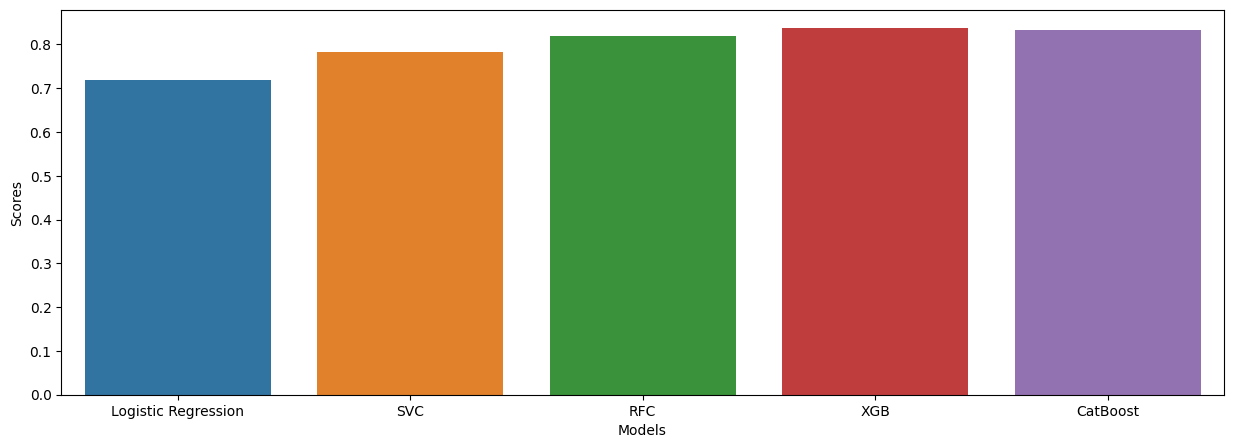

In [55]:
plt.figure(figsize=(15,5))
sns.barplot(results, x = "Models", y = "Scores")

In conlusion, we can provide more accuracy by hyperparameter tuning, but i choosed to apply balancing in the data set, so I can avoid proccessing time, and the results can show us that the xgboost, catboost performing well in the instances